In [52]:
##% CARGA DE LAS LIBRERIAS

# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [53]:
##% CARGA DEL ARCHIVO CSV

# Leer el archivo CSV
file_path = r".\dxCrop_Soil.csv"
try:
    # Leer el archivo CSV
    df_crude = pd.read_csv(file_path)
    
    # Mostrar las primeras 5 filas del dataset
    print("Primeras 5 filas del dataset:")
    print(df.head())
    
    # Mostrar información general del dataset
    print("\nInformacion del dataset:")
    print(f"Numero de filas: {df.shape[0]}")
    print(f"Numero de columnas: {df.shape[1]}")
    print("\nNombres de las columnas:")
    print(df.columns.tolist())
    
    # Mostrar estadísticas básicas
    print("\nEstadisticas basicas:")
    print(df.describe())
    
except FileNotFoundError:
    print(f"Error: El archivo {file_path} no se encontro.")
except Exception as e:
    print(f"Ocurrio un error: {e}")

Primeras 5 filas del dataset:
   temperatura  humedad  aguaEnSuelo  tipoSuelo tipoCultivo  nitrogeno  \
0         26.0     52.0         38.0    Arenoso        Maiz         37   
1         29.0     52.0         45.0     Franco  CañaAzucar         12   
2         34.0     65.0         62.0      Negro     Algodon          7   
3         32.0     62.0         34.0       Rojo      Tabaco         22   
4         28.0     54.0         46.0  Arcilloso     Arrozal         35   

   potasio  fosforo nombreFertilizante  
0        0        0               Urea  
1        0       36                DAP  
2        9       30           14-35-14  
3        0       20              28-28  
4        0        0               Urea  

Informacion del dataset:
Numero de filas: 8000
Numero de columnas: 9

Nombres de las columnas:
['temperatura', 'humedad', 'aguaEnSuelo', 'tipoSuelo', 'tipoCultivo', 'nitrogeno', 'potasio', 'fosforo', 'nombreFertilizante']

Estadisticas basicas:
       temperatura      humedad  

temperatura           0
humedad               0
aguaEnSuelo           0
tipoSuelo             0
tipoCultivo           0
nitrogeno             0
potasio               0
fosforo               0
nombreFertilizante    0
dtype: int64
Porcentaje de valores NaN por columna:
temperatura           0.0
humedad               0.0
aguaEnSuelo           0.0
tipoSuelo             0.0
tipoCultivo           0.0
nitrogeno             0.0
potasio               0.0
fosforo               0.0
nombreFertilizante    0.0
dtype: float64


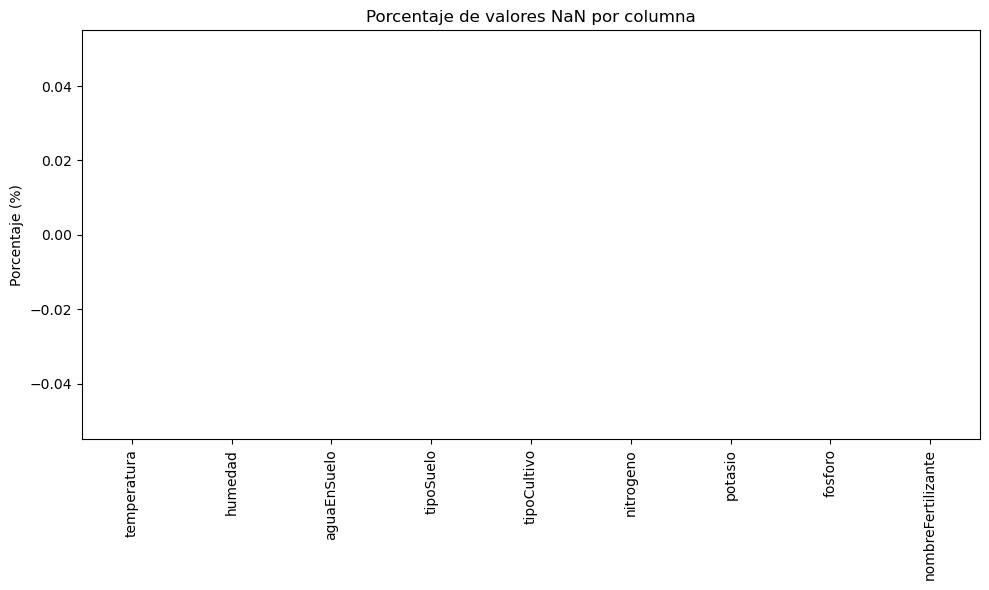

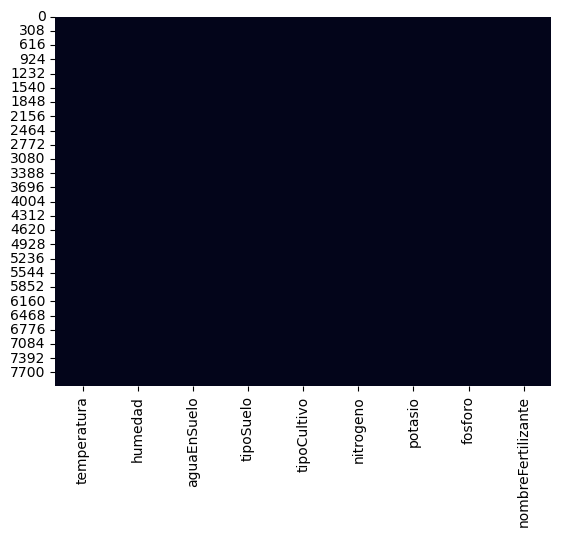

In [54]:
#%% ESTUDIO DE LA INTEGRIDAD DE NULOS DEL DATAFRAME

print(df_crude.isnull().sum())

# Calcular y mostrar el porcentaje de valores NaN por columna
missing_percentage = df.isnull().mean() * 100
print("Porcentaje de valores NaN por columna:")
print(missing_percentage.sort_values(ascending=False))

# Visualizar el porcentaje de valores NaN por columna
plt.figure(figsize=(10, 6))
missing_percentage.sort_values().plot(kind='bar')
plt.title('Porcentaje de valores NaN por columna')
plt.ylabel('Porcentaje (%)')
plt.tight_layout()
plt.show()

# Realizar un heatmap de los NaN del dataset
sns.heatmap(df_working.isnull(), cbar=False)
plt.show()

In [56]:
def analyze_variable(df, column_name, figsize=(15, 12), save_path=None):
    """
    Analizar una variable (columna) de un DataFrame y generar las graficas para entender la distribucion
    
    Argumentos:
    -----------
    df : dataframe utilizado
    column_name : Nombre de la columna a analizar
    figsize : Tamaño de la figura para agregar las graficas
    save_path : Ruta donde guardar la figura (opcional)
    """
    
    # Analizar si la columna existe en el DataFrame
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame")
        return
    
    # Crear la figura con 5 subplots (4 gráficos + 1 tabla)
    fig, axes = plt.subplots(3, 2, figsize=figsize, gridspec_kw={'height_ratios': [1, 1, 0.5]})
    fig.suptitle(f'Analisis de {column_name}', fontsize=16)
    
    # Obtener informacion de la columna
    data = df[column_name]
    
    # Analizar si la columna es numerica o categorica
    is_numeric = pd.api.types.is_numeric_dtype(data)
    
    # Estadisticas basicas
    print(f"Basic statistics for {column_name}:")
    if is_numeric:
        stats_data = data.describe()
        print(stats_data)
    else:
        print(f"Count: {data.count()}")
        print(f"Unique values: {data.nunique()}")
        print(f"Most common value: {data.value_counts().index[0]} (appears {data.value_counts().iloc[0]} times)")
        print(f"Missing values: {data.isna().sum()} ({data.isna().mean()*100:.2f}%)")
    
    # Plot 1: Grafica de distribucion para datos numericos con KDE o barras para categoricas
    if is_numeric:
        sns.histplot(data, kde=True, ax=axes[0, 0])
        axes[0, 0].set_title(f'Distribucion de {column_name}')
        axes[0, 0].set_xlabel(column_name)
        axes[0, 0].set_ylabel('Frecuencia')
    else:
        # Para datos categoricos, mostrar solo los primeros 10 valores
        value_counts = data.value_counts().head(10)
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 0])
        axes[0, 0].set_title(f'Top 10 categories in {column_name}')
        axes[0, 0].set_xlabel(column_name)
        axes[0, 0].set_ylabel('Count')
        axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Box plot para datos numericos o torta para categoricas con 5 categorias top y "Otros" para el resto de las categoricas
    if is_numeric:
        sns.boxplot(y=data, ax=axes[0, 1])
        axes[0, 1].set_title(f'Boxplot de {column_name}')
        axes[0, 1].set_ylabel(column_name)
    else:
        # Pie chart for top 5 categories
        top_5 = data.value_counts().head(5)
        others = data.value_counts().sum() - top_5.sum()
        if others > 0:
            top_5['Otros'] = others
        axes[0, 1].pie(top_5, labels=top_5.index, autopct='%1.1f%%')
        axes[0, 1].set_title(f'Top 5 categorias en {column_name}')
    
    # Plot 3: Visualiazcion de valores faltantes en el dataset
    missing = data.isna()
    axes[1, 0].bar(['Presentes', 'Faltantes'], [len(data) - missing.sum(), missing.sum()])
    axes[1, 0].set_title(f'Missing values in {column_name}')
    axes[1, 0].set_ylabel('Count')
    
    # Plot 4: Informacion adicional para datos numericos o acumulativa para categoricas
    if is_numeric:
        # QQ plot para datos numericos
        from scipy import stats
        stats.probplot(data.dropna(), plot=axes[1, 1])
        axes[1, 1].set_title(f'QQ Plot of {column_name}')
    else:
        # Porcentaje acumulativo de categorias
        cum_pct = data.value_counts().sort_values(ascending=False).cumsum() / data.count() * 100
        cum_pct = cum_pct.reset_index()
        cum_pct.columns = [column_name, 'Cumulative Percentage']
        
        # Plot de las 10 categorias mas frecuentes
        sns.lineplot(x=range(len(cum_pct[:10])), y=cum_pct['Cumulative Percentage'][:10], ax=axes[1, 1], marker='o')
        axes[1, 1].set_xticks(range(len(cum_pct[:10])))
        axes[1, 1].set_xticklabels(cum_pct[column_name][:10], rotation=45)
        axes[1, 1].set_title('Porcentaje acumulado de categorias')
        axes[1, 1].set_ylabel('Porcentaje acumulado')
        axes[1, 1].set_xlabel(column_name)
    
    # Añadir tabla con estadísticas
    axes[2, 0].axis('off')
    axes[2, 1].axis('off')
    
    # Crear tabla de estadísticas
    if is_numeric:
        stats_dict = {
            'Estadística': ['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo', 'Valores faltantes', '% faltantes'],
            'Valor': [
                f"{data.mean():.4f}",
                f"{data.median():.4f}",
                f"{data.std():.4f}",
                f"{data.min():.4f}",
                f"{data.max():.4f}",
                f"{data.isna().sum()}",
                f"{data.isna().mean()*100:.2f}%"
            ]
        }
    else:
        stats_dict = {
            'Estadística': ['Total valores', 'Valores únicos', 'Valor más común', 'Frecuencia más común', 'Valores faltantes', '% faltantes'],
            'Valor': [
                f"{data.count()}",
                f"{data.nunique()}",
                f"{data.value_counts().index[0]}",
                f"{data.value_counts().iloc[0]}",
                f"{data.isna().sum()}",
                f"{data.isna().mean()*100:.2f}%"
            ]
        }
    
    # Crear tabla
    table = axes[2, 0].table(
        cellText=[[stats_dict['Valor'][i]] for i in range(len(stats_dict['Valor']))],
        rowLabels=stats_dict['Estadística'],
        colLabels=['Valor'],
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    
    # Guardar la figura si se proporciona una ruta
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figura guardada en: {save_path}")
    
    plt.show()
    
    # Devuelve data numerica calculada y categorica calculada de ser necesaria
    if is_numeric:
        return {
            'mean': data.mean(),
            'median': data.median(),
            'std': data.std(),
            'min': data.min(),
            'max': data.max(),
            'missing': data.isna().sum(),
            'missing_pct': data.isna().mean() * 100
        }
    else:
        return {
            'unique_count': data.nunique(),
            'most_common': data.value_counts().index[0],
            'most_common_count': data.value_counts().iloc[0],
            'missing': data.isna().sum(),
            'missing_pct': data.isna().mean() * 100
        }

Basic statistics for temperatura:
count    8000.000000
mean       30.338895
std         4.478262
min        20.000000
25%        27.050000
50%        30.240000
75%        33.460000
max        40.000000
Name: temperatura, dtype: float64
Figura guardada en: ./temperatura.png


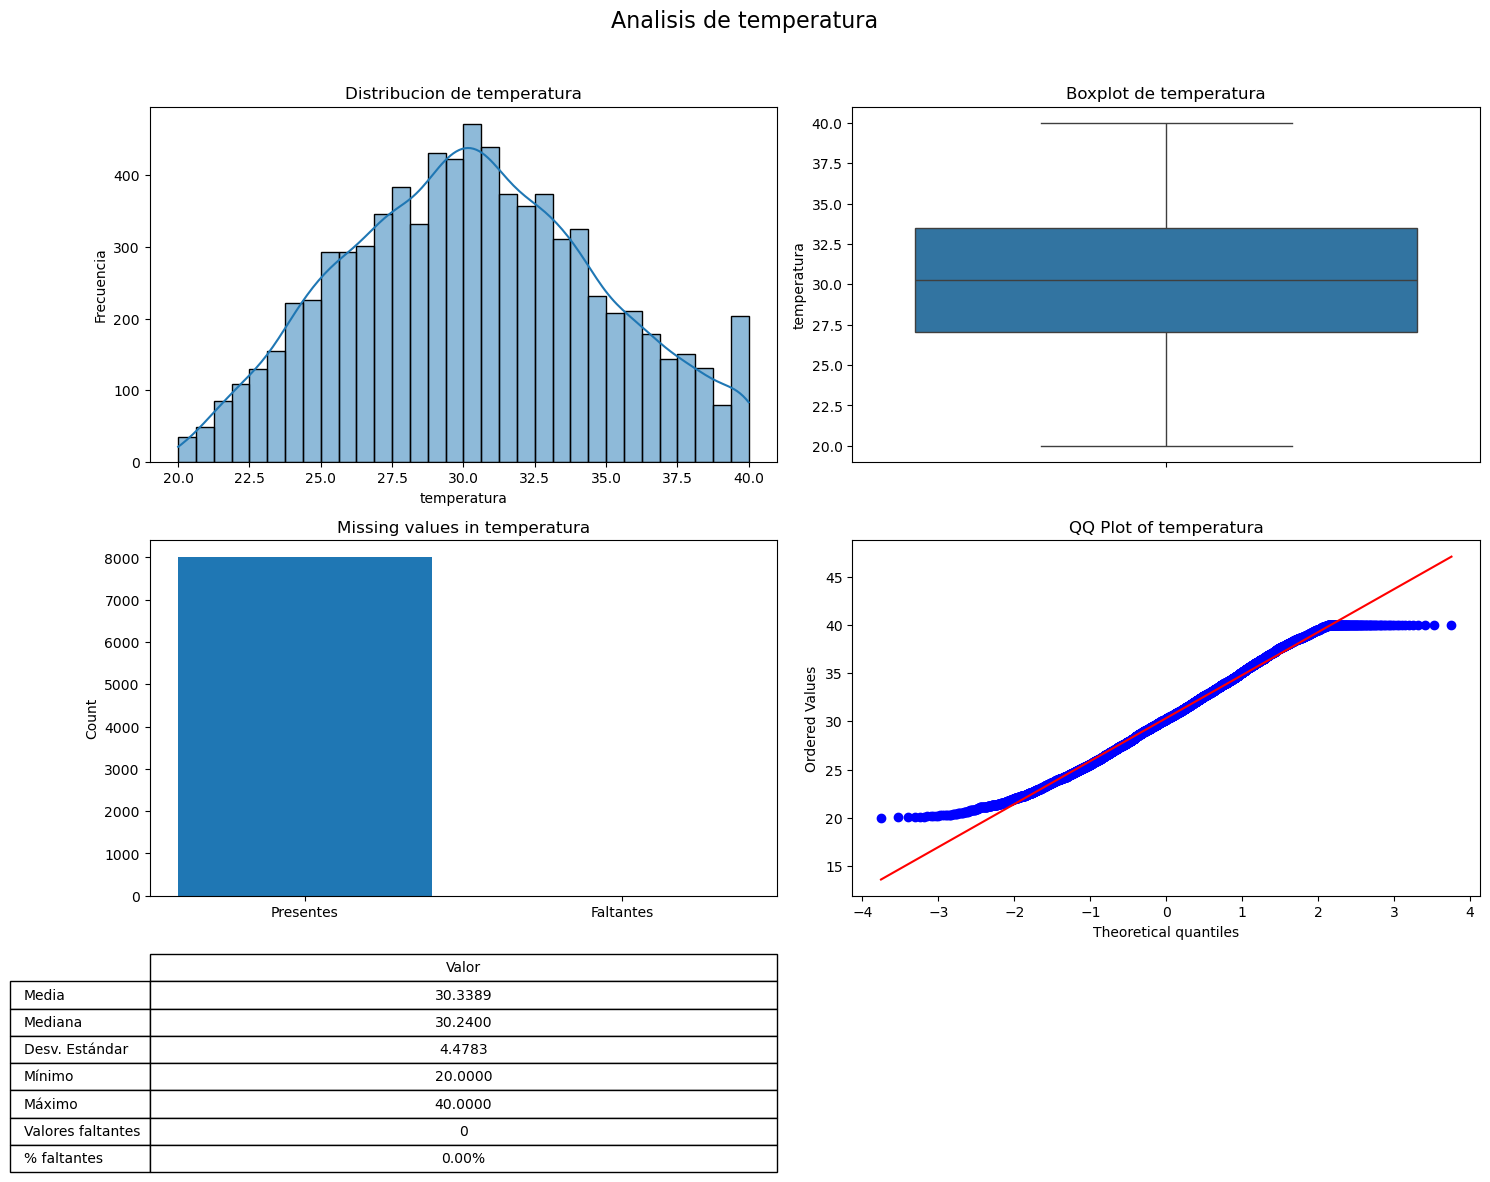

Basic statistics for humedad:
count    8000.000000
mean       59.210731
std         8.177366
min        40.020000
25%        53.277500
50%        59.110000
75%        65.082500
max        80.000000
Name: humedad, dtype: float64
Figura guardada en: ./humedad.png


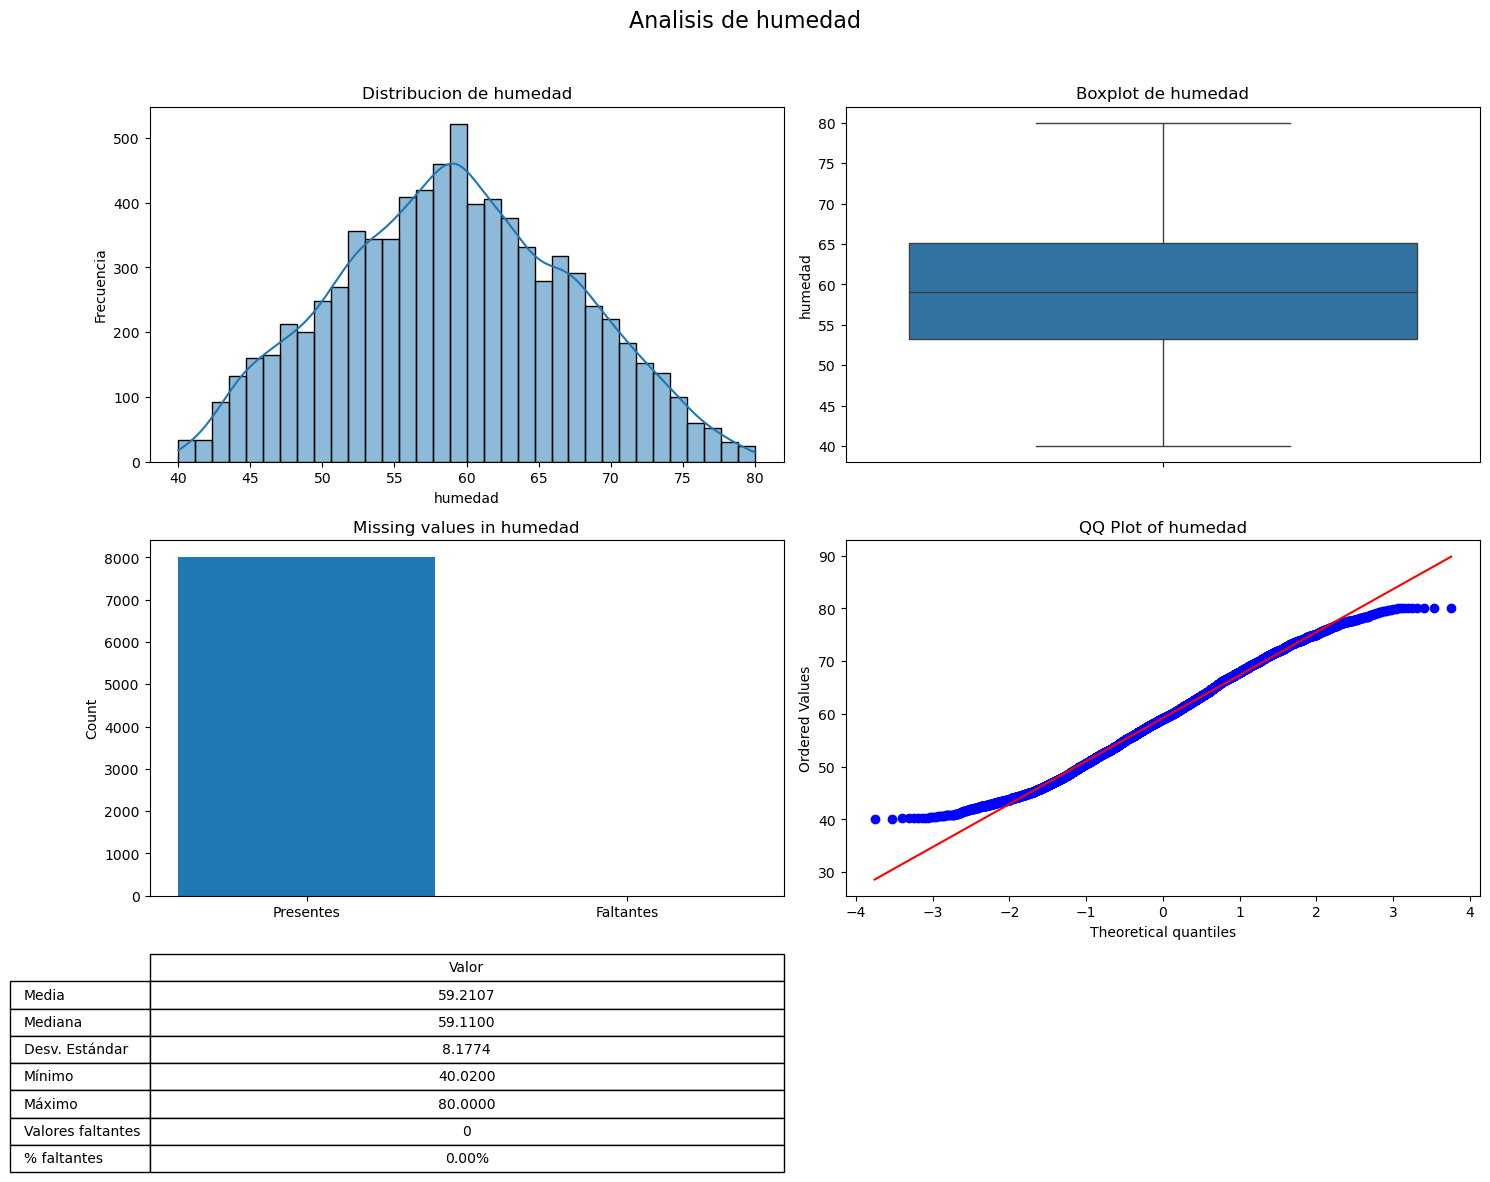

Basic statistics for aguaEnSuelo:
count    8000.000000
mean       43.580862
std        12.596156
min        20.000000
25%        33.967500
50%        42.250000
75%        52.950000
max        70.000000
Name: aguaEnSuelo, dtype: float64
Figura guardada en: ./aguaEnSuelo.png


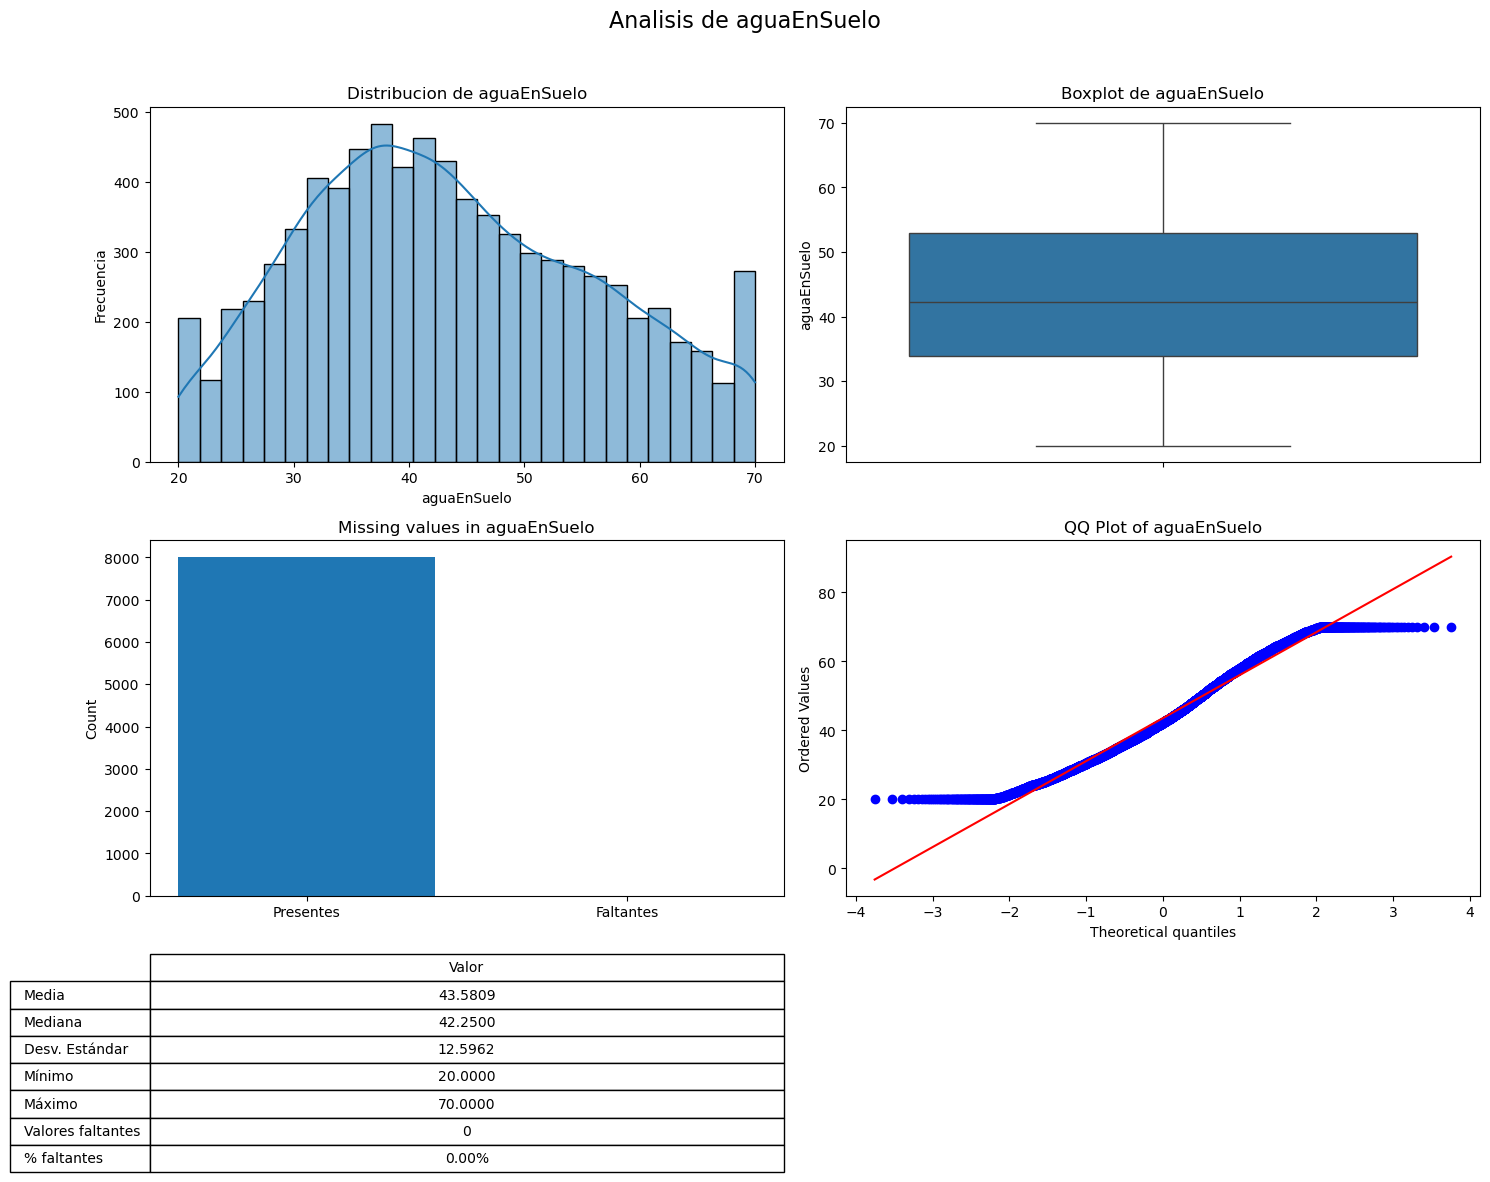

Basic statistics for tipoSuelo:
Count: 8000
Unique values: 5
Most common value: Arcilloso (appears 1623 times)
Missing values: 0 (0.00%)
Figura guardada en: ./tipoSuelo.png


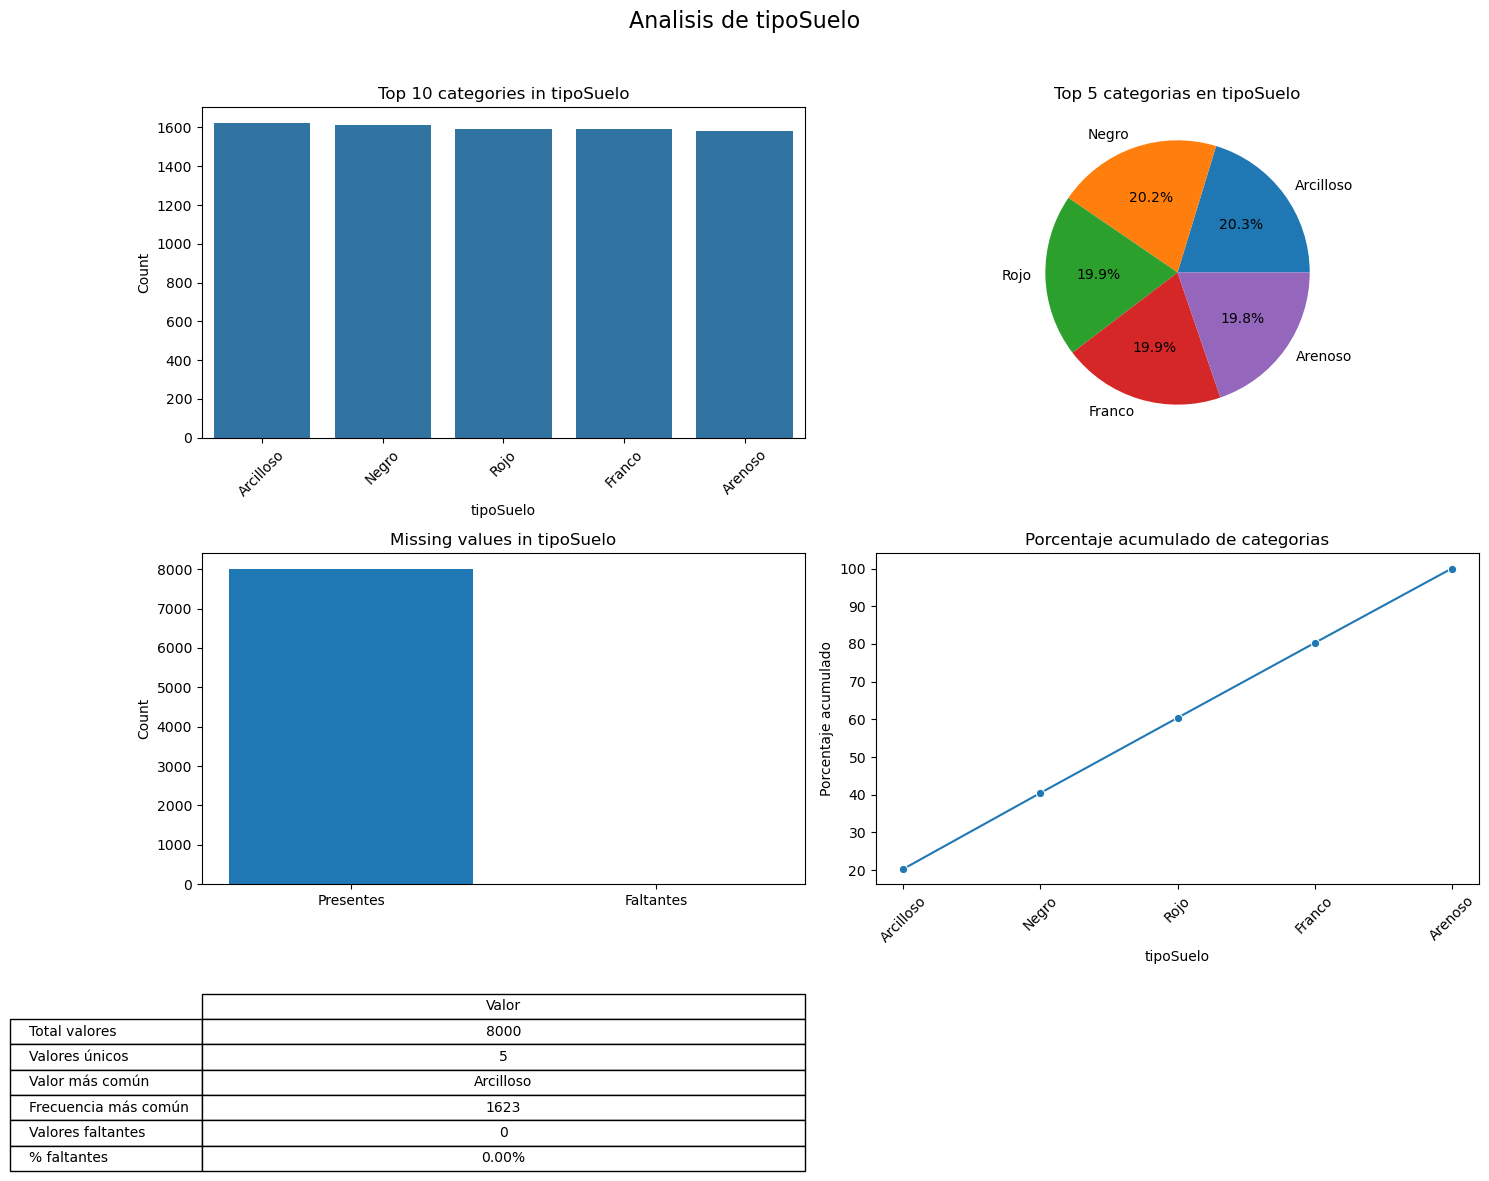

Basic statistics for tipoCultivo:
Count: 8000
Unique values: 11
Most common value: CañaAzucar (appears 763 times)
Missing values: 0 (0.00%)
Figura guardada en: ./tipoCultivo.png


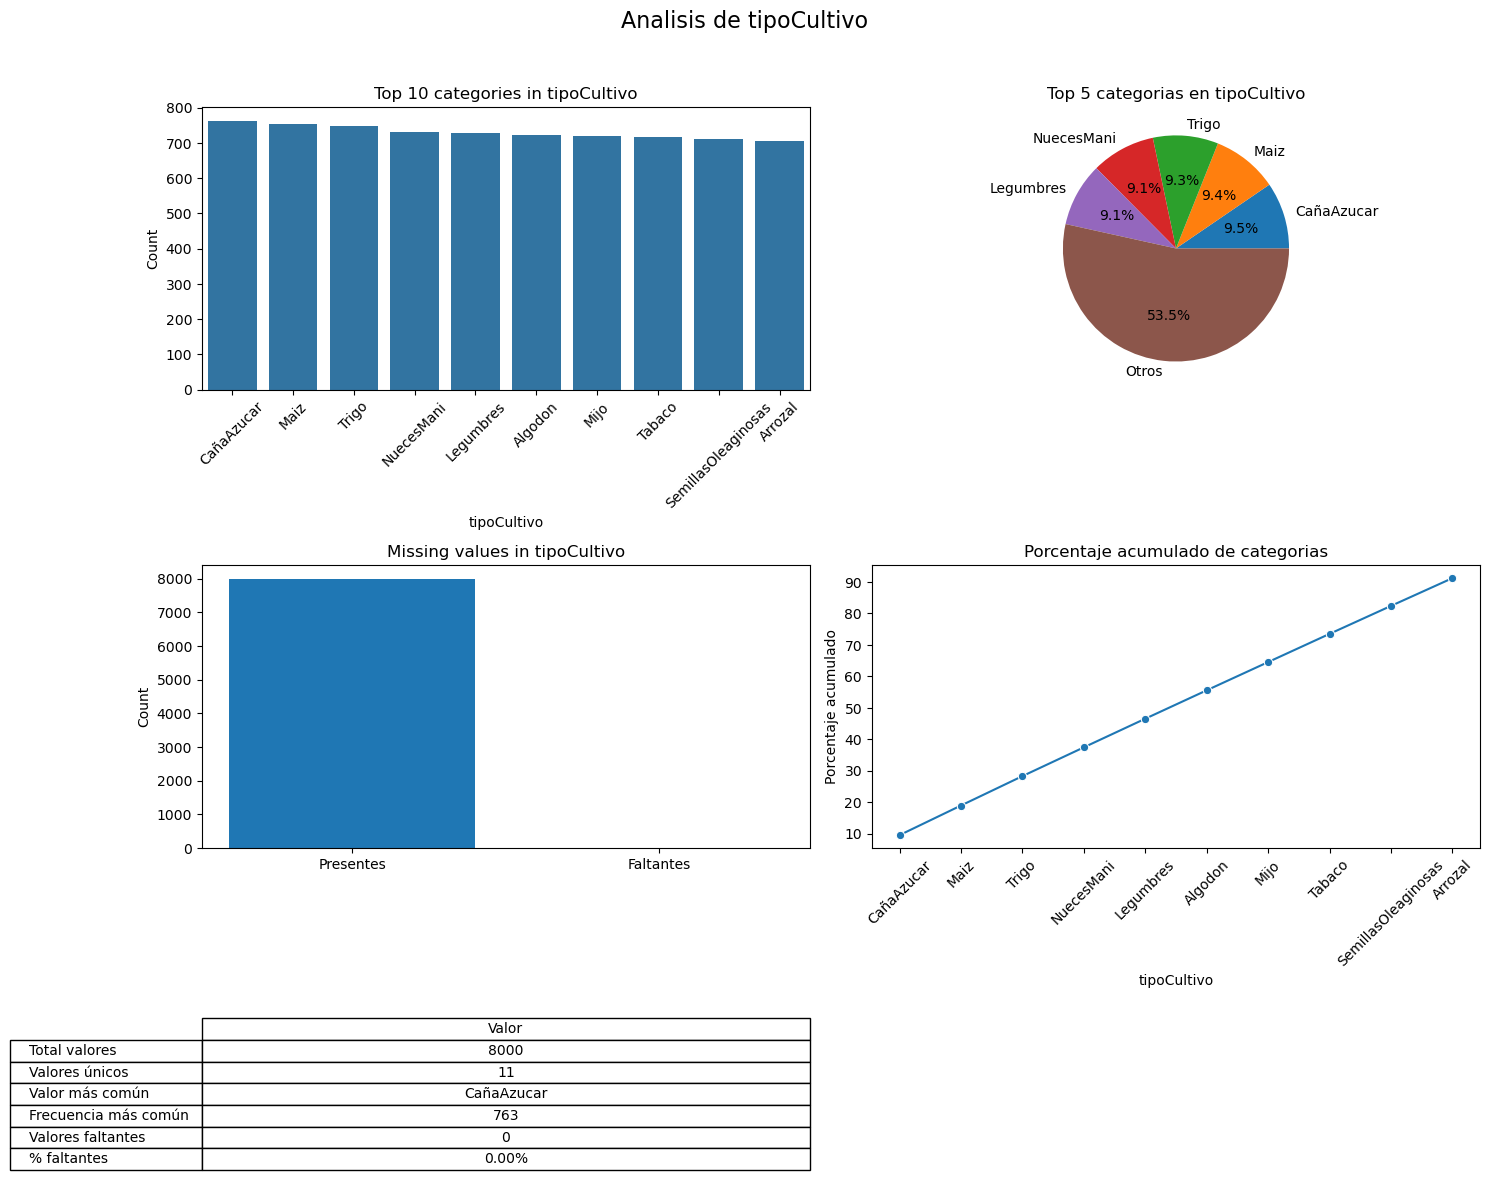

Basic statistics for nitrogeno:
count    8000.000000
mean       18.429125
std        11.852406
min         0.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        46.000000
Name: nitrogeno, dtype: float64
Figura guardada en: ./nitrogeno.png


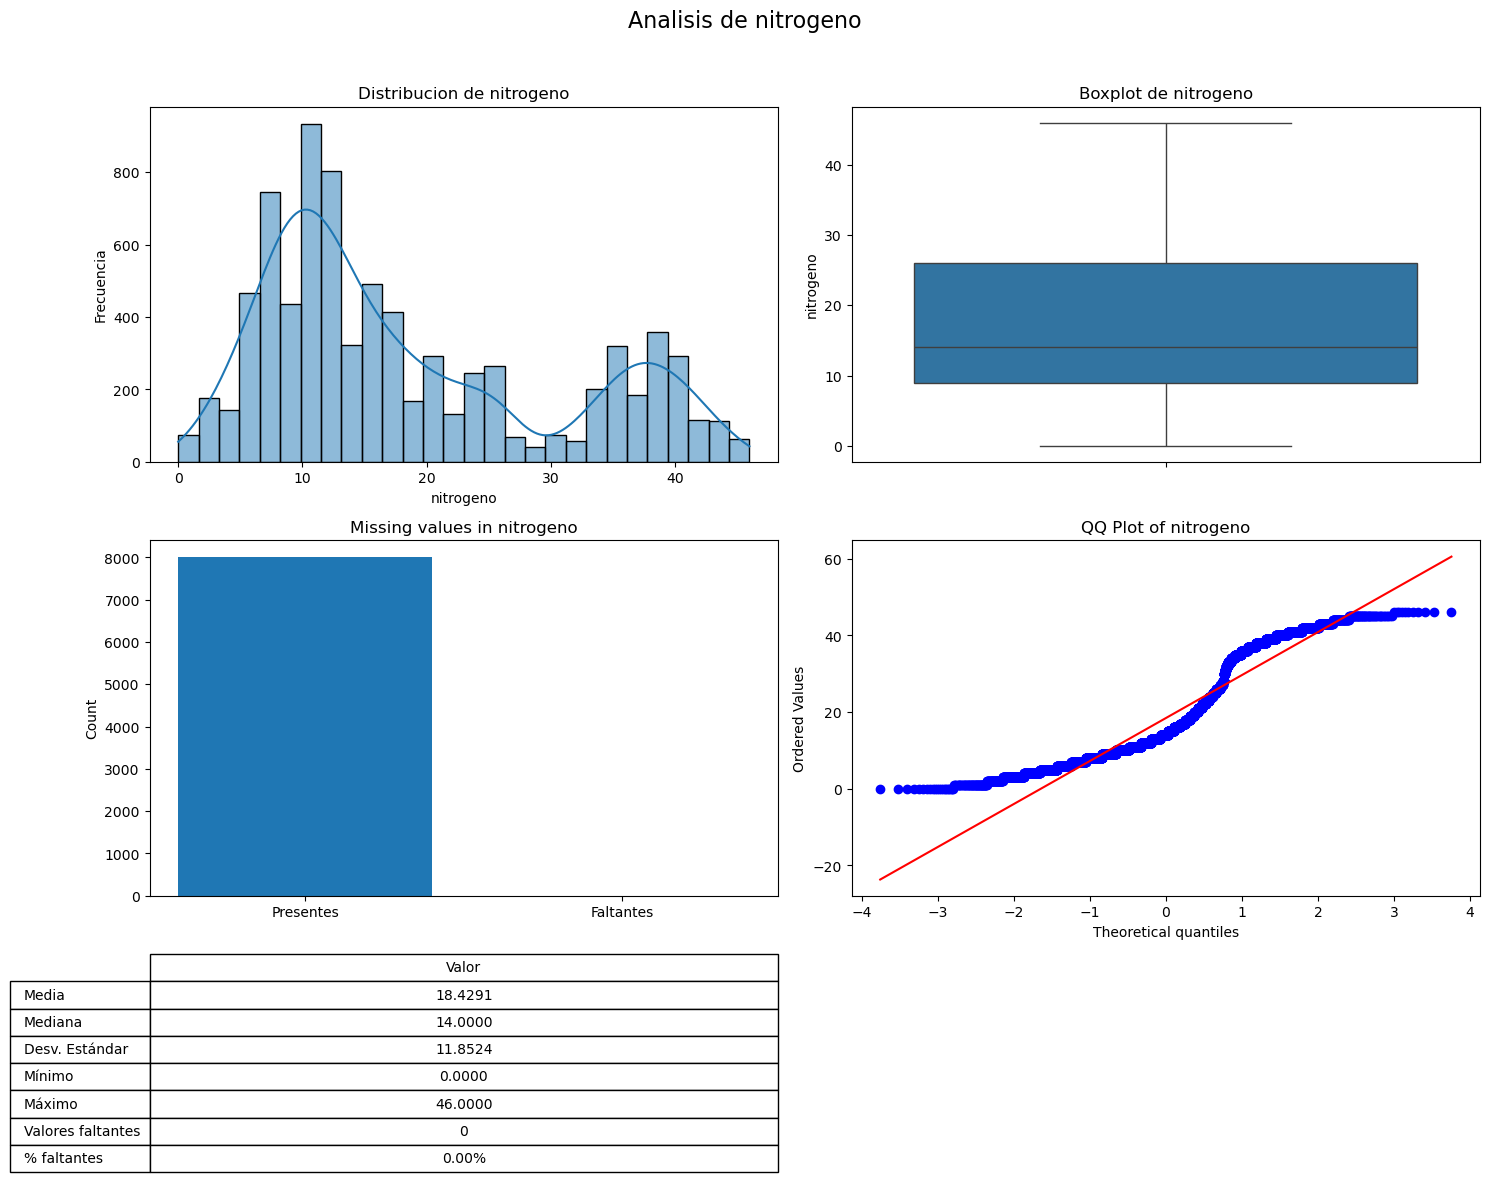

Basic statistics for potasio:
count    8000.000000
mean        3.916375
std         5.494807
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        23.000000
Name: potasio, dtype: float64
Figura guardada en: ./potasio.png


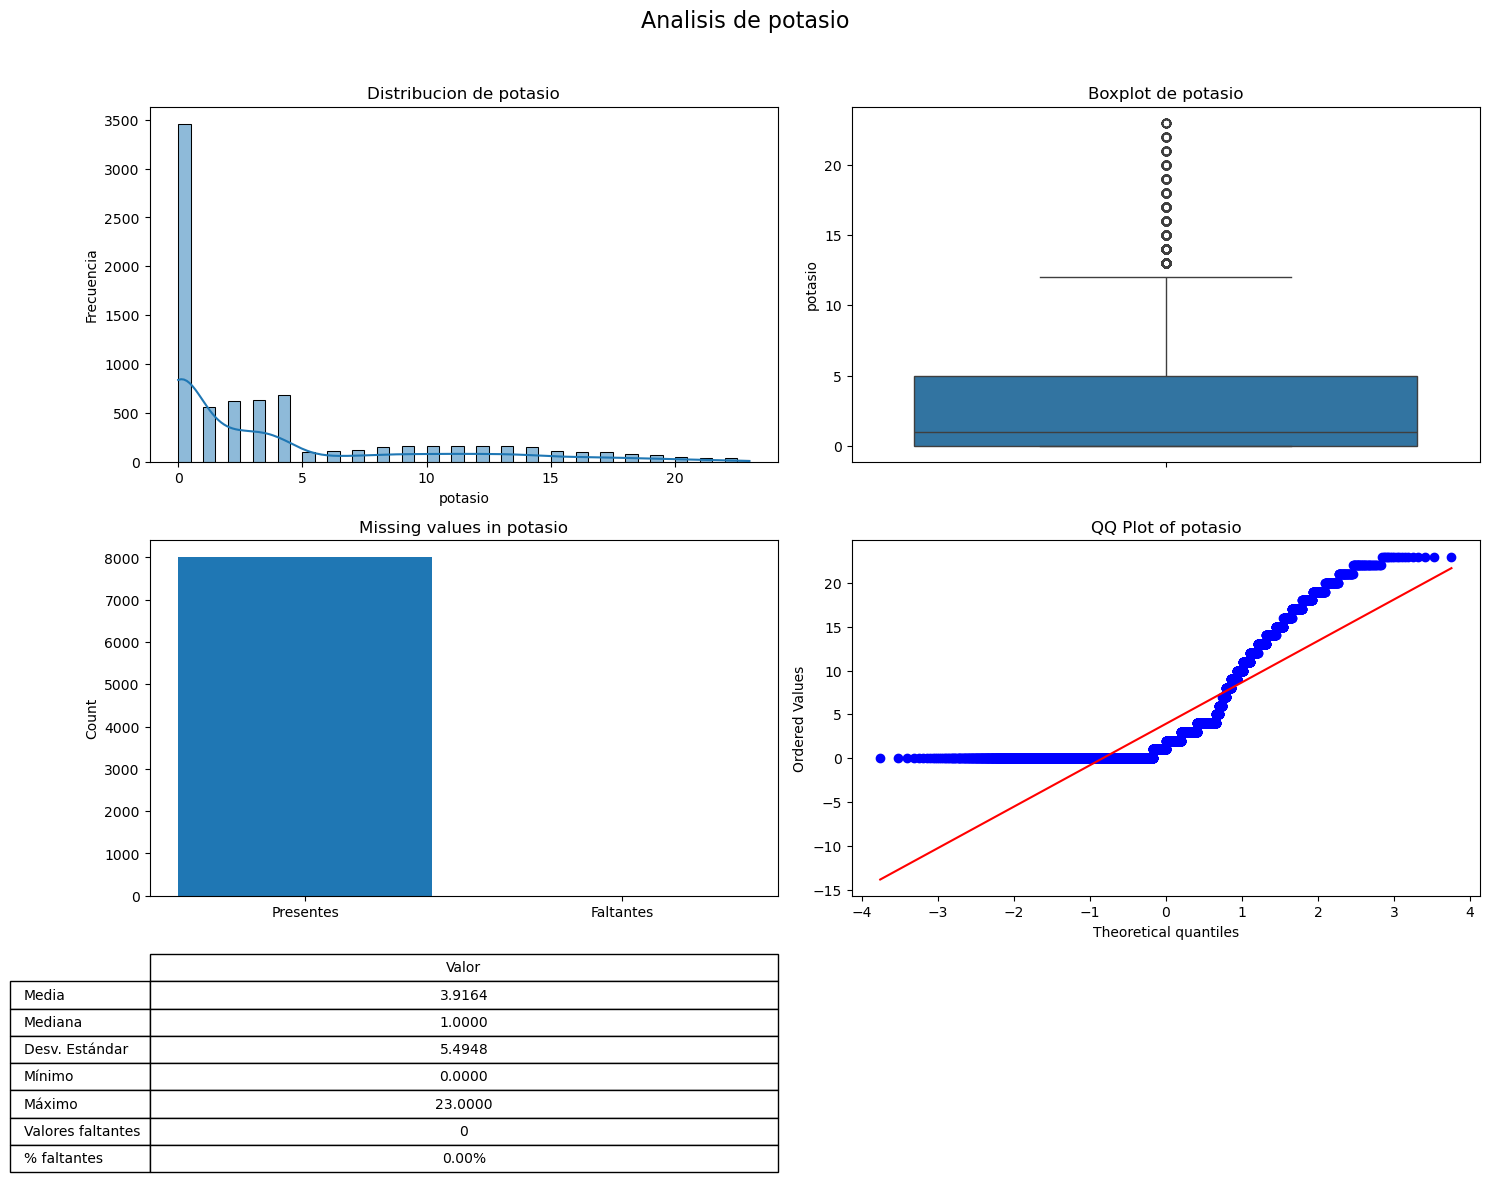

Basic statistics for fosforo:
count    8000.000000
mean       18.512500
std        13.244113
min         0.000000
25%         8.000000
50%        18.000000
75%        30.000000
max        46.000000
Name: fosforo, dtype: float64
Figura guardada en: ./fosforo.png


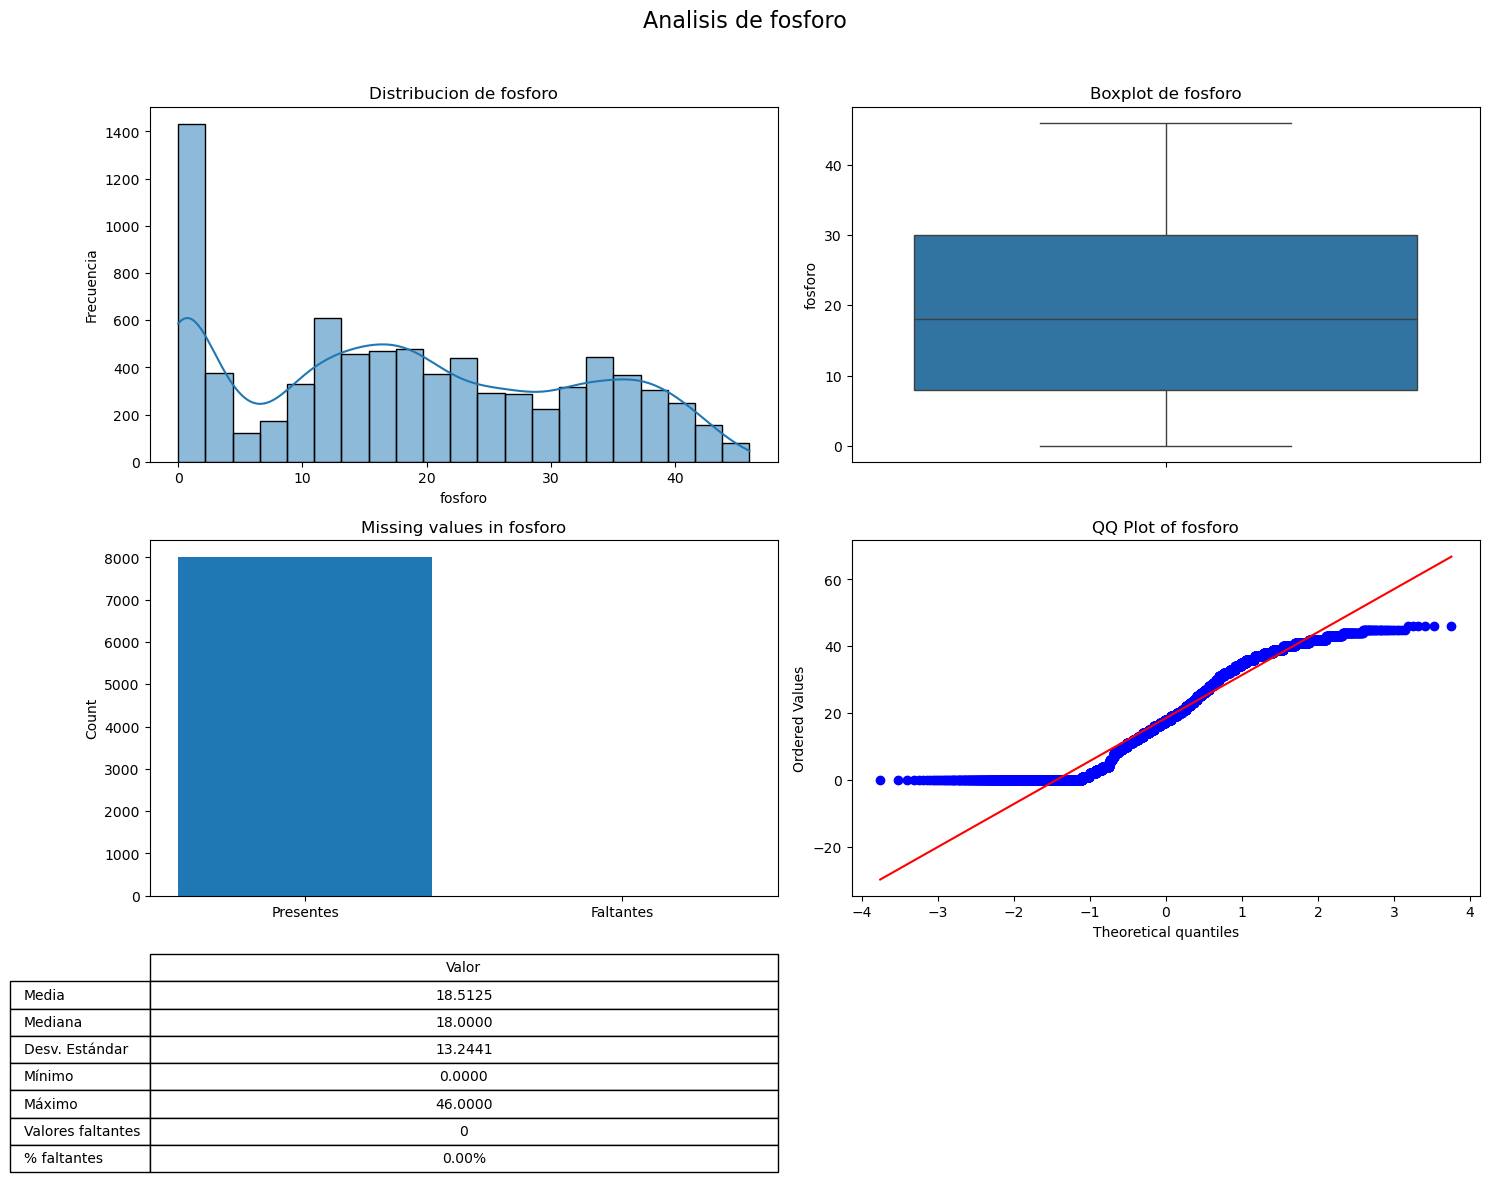

Basic statistics for nombreFertilizante:
Count: 8000
Unique values: 7
Most common value: 14-35-14 (appears 1188 times)
Missing values: 0 (0.00%)
Figura guardada en: ./nombreFertilizante.png


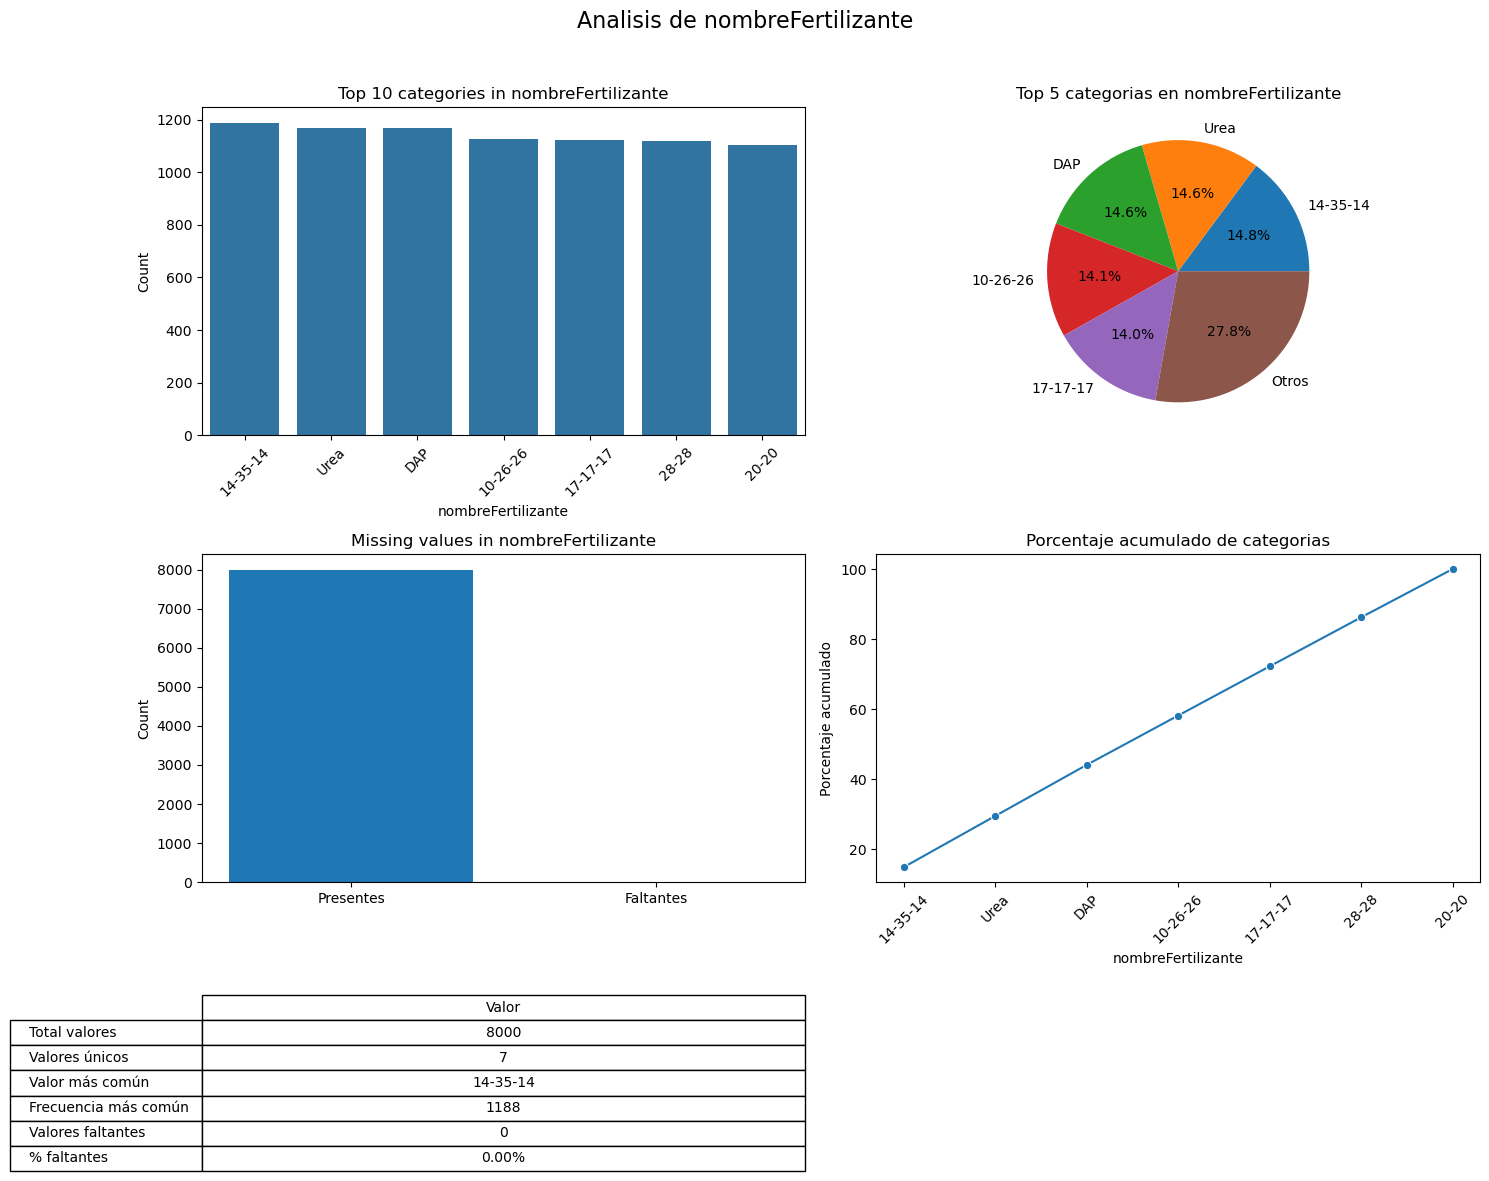

In [57]:
for i in df_crude.columns:
    path=f"./{i}.png"
    analyze_variable(df_crude, i, save_path=path)

In [58]:
def analyze_correlations(df, save_path='./Correlacion.png', 
                         graph_path='./Correlacion_grafo.png',
                         threshold=0.3):
    """
    Analiza la correlación entre variables numéricas y genera visualizaciones
    
    Argumentos:
    -----------
    df : DataFrame a analizar
    save_path : Ruta donde guardar la matriz de correlación
    graph_path : Ruta donde guardar el grafo de correlación
    threshold : Umbral de correlación para mostrar en el grafo (valor absoluto)
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import networkx as nx
    from matplotlib.colors import Normalize
    
    # Seleccionar solo columnas numéricas
    numeric_df = df.select_dtypes(include=['number'])
    
    # Verificar si hay suficientes columnas numéricas
    if numeric_df.shape[1] < 2:
        print("Error: Se necesitan al menos 2 columnas numéricas para calcular correlaciones.")
        return None
    
    # Calcular la matriz de correlación
    corr_matrix = numeric_df.corr()
    
    # Crear figura para la matriz de correlación (NxN completa)
    plt.figure(figsize=(14, 12))
    
    # Crear un mapa de calor de la matriz de correlación completa (sin máscara triangular)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(corr_matrix, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})
    
    plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
    plt.tight_layout()
    
    # Guardar la matriz de correlación
    try:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Matriz de correlación guardada en: {save_path}")
    except Exception as e:
        print(f"Error al guardar la matriz de correlación: {e}")
    
    plt.show()
    
    try:
        # Crear un grafo usando NetworkX
        G = nx.Graph()
        
        # Obtener nombres de variables
        variables = corr_matrix.columns
        
        # Añadir nodos al grafo (variables)
        for var in variables:
            G.add_node(var)
        
        # Añadir aristas con pesos basados en la correlación (solo si supera el umbral)
        for i, var1 in enumerate(variables):
            for j, var2 in enumerate(variables):
                if i < j:  # Para evitar duplicados
                    corr_value = abs(corr_matrix.loc[var1, var2])
                    if corr_value >= threshold:
                        G.add_edge(var1, var2, weight=corr_value)
        
        # Verificar si hay aristas en el grafo
        if len(G.edges()) == 0:
            print(f"No se encontraron correlaciones que superen el umbral de {threshold}.")
            print("Intente reducir el valor del umbral.")
            return corr_matrix
        
        # Crear una nueva figura para el grafo
        fig, ax = plt.subplots(figsize=(14, 12))
        
        # Posicionar los nodos
        pos = nx.spring_layout(G, seed=42, k=0.8)  # k controla la distancia entre nodos
        
        # Dibujar nodos
        nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue', alpha=0.8, ax=ax)
        
        # Dibujar etiquetas
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax)
        
        # Dibujar aristas con grosor proporcional a la correlación
        edges = G.edges(data=True)
        weights = [data['weight'] * 5 for _, _, data in edges]  # Multiplicar por 5 para hacer más visibles las líneas
        
        # Crear un mapa de colores para las aristas basado en la fuerza de correlación
        norm = Normalize(vmin=threshold, vmax=1)
        edge_colors = [plt.cm.plasma(norm(data['weight'])) for _, _, data in edges]
        
        nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_colors, alpha=0.7, ax=ax)
        
        # Añadir valores de correlación como etiquetas en las aristas
        edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, ax=ax)
        
        ax.set_title('Grafo de Correlaciones entre Variables Numéricas', fontsize=16)
        ax.axis('off')
        
        # Añadir una barra de color para interpretar los valores
        sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=ax, shrink=0.8, pad=0.05)  # Especificar el eje para la barra de color
        cbar.set_label('Fuerza de Correlación (valor absoluto)')
        
        plt.tight_layout()
        
        # Guardar el grafo
        plt.savefig(graph_path, dpi=300, bbox_inches='tight')
        print(f"Grafo de correlación guardado en: {graph_path}")
        
    except Exception as e:
        print(f"Error al crear o guardar el grafo de correlación: {e}")
        import traceback
        traceback.print_exc()
    
    plt.show()
    
    return corr_matrix



Matriz de correlación guardada en: ./Correlacion.png


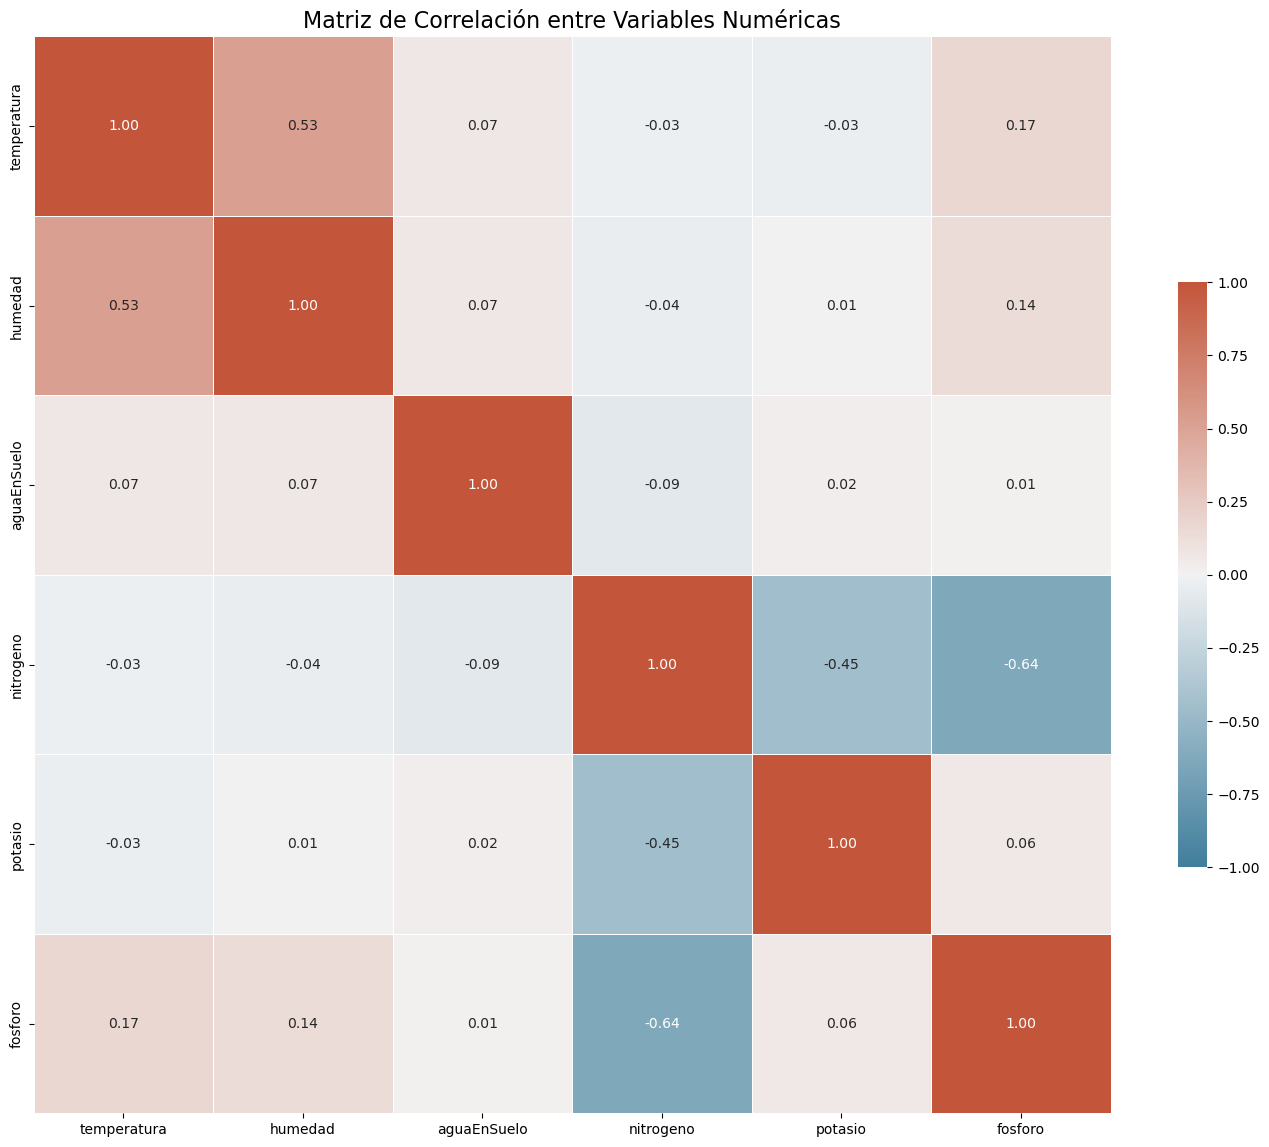

Grafo de correlación guardado en: ./Correlacion_grafo.png


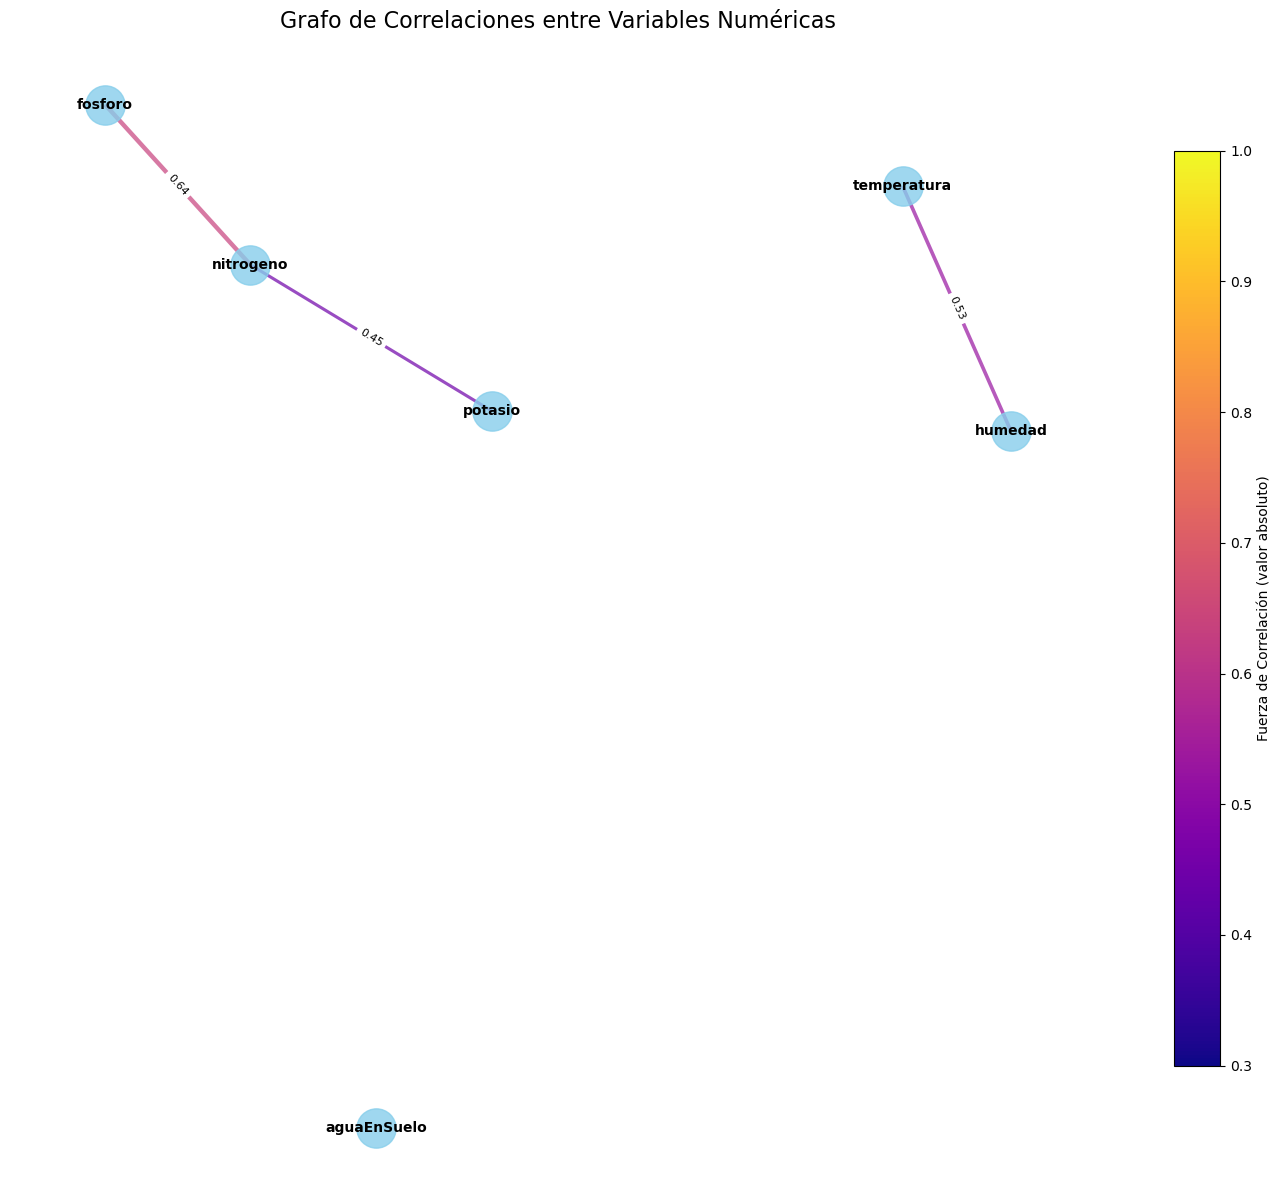

In [59]:
# Ejemplo de uso:
# df = pd.read_csv('tu_dataset.csv')
corr_matrix = analyze_correlations(df_crude)

Columnas en el dataset de características:
Index(['temperatura', 'humedad', 'aguaEnSuelo', 'tipoSuelo', 'nitrogeno',
       'potasio', 'fosforo', 'nombreFertilizante'],
      dtype='object')

Información sobre la variable objetivo (tipoCultivo):
Número de clases: 11

Distribución de clases:
tipoCultivo
CañaAzucar             763
Maiz                   753
Trigo                  747
NuecesMani             732
Legumbres              728
Algodon                722
Mijo                   718
Tabaco                 717
SemillasOleaginosas    711
Arrozal                706
Cebada                 703
Name: count, dtype: int64

Distribución porcentual:
tipoCultivo
CañaAzucar             9.5375
Maiz                   9.4125
Trigo                  9.3375
NuecesMani             9.1500
Legumbres              9.1000
Algodon                9.0250
Mijo                   8.9750
Tabaco                 8.9625
SemillasOleaginosas    8.8875
Arrozal                8.8250
Cebada                 8.7875
Name:

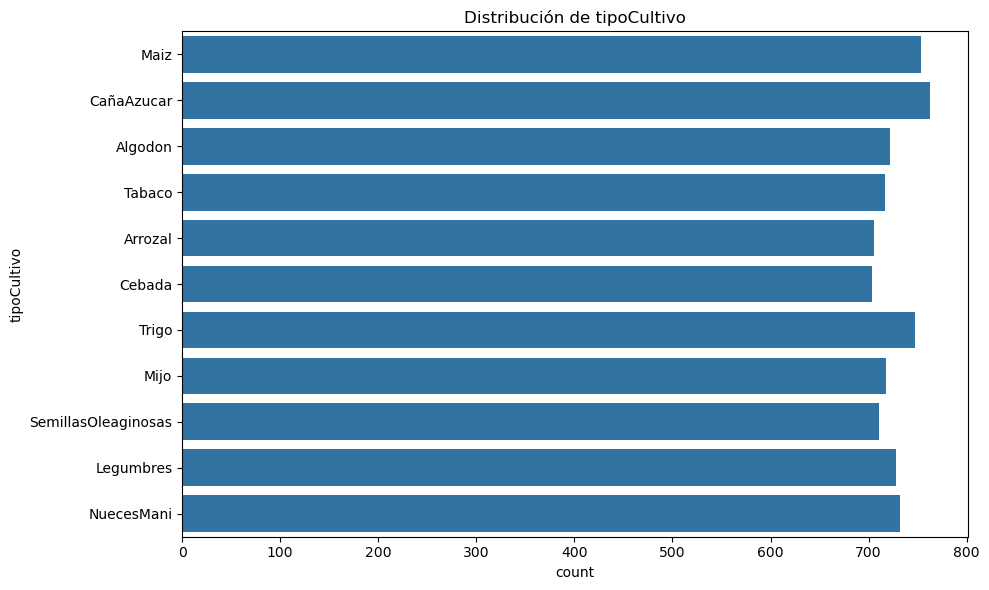

In [60]:
# Separar la variable objetivo (tipoCultivo) del resto del dataset
X = df_crude.drop('tipoCultivo', axis=1)  # Dataset sin la variable a predecir
y = df_crude['tipoCultivo']  # Variable objetivo

# Verificar las columnas restantes en X
print("Columnas en el dataset de características:")
print(X.columns)

# Información básica sobre la variable objetivo
print("\nInformación sobre la variable objetivo (tipoCultivo):")
print(f"Número de clases: {y.nunique()}")
print("\nDistribución de clases:")
print(y.value_counts())
print("\nDistribución porcentual:")
print(y.value_counts(normalize=True) * 100)

# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.countplot(y=y)
plt.title('Distribución de tipoCultivo')
plt.tight_layout()
plt.show()

C:\Users\gfrat\AppData\Local\Temp\ipykernel_16252\230444281.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\gfrat\AppData\Local\Temp\ipykernel_16252\230444281.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\gfrat\AppData\Local\Temp\ipykernel_16252\230444281.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\gfrat\AppData\Local\Temp\ipykernel_16252\230444281.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklab

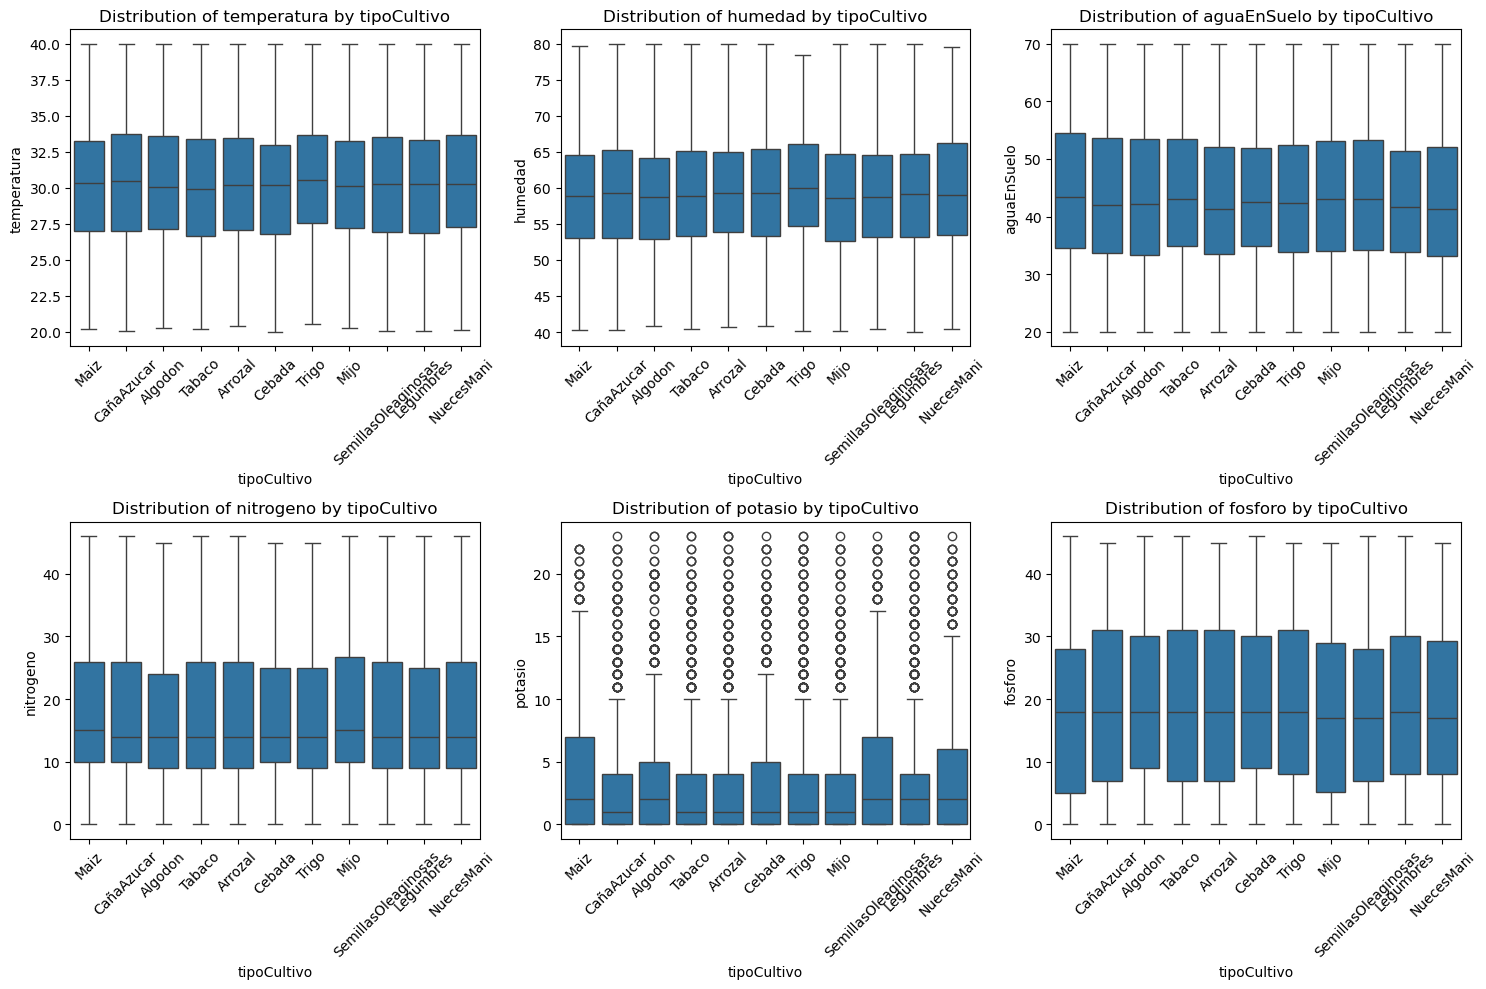


Creating individual boxplots for better visibility:


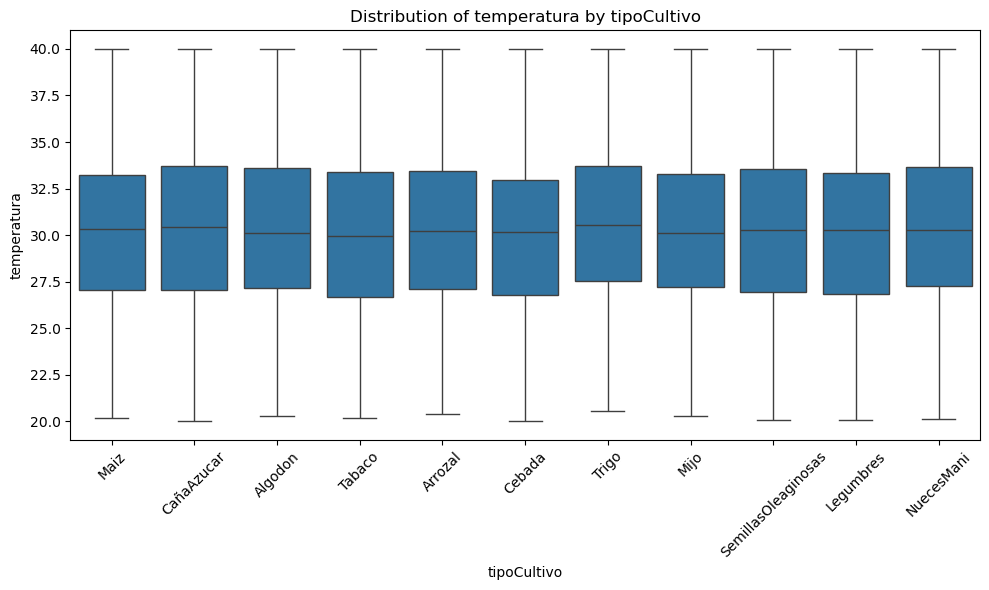


Statistics for temperatura by tipoCultivo:
                     count       mean       std    min      25%     50%  \
tipoCultivo                                                               
Algodon              722.0  30.348906  4.599281  20.27  27.1325  30.090   
Arrozal              706.0  30.328924  4.543571  20.41  27.1025  30.230   
CañaAzucar           763.0  30.485033  4.509073  20.03  27.0250  30.440   
Cebada               703.0  30.198009  4.379935  20.00  26.7950  30.180   
Legumbres            728.0  30.198104  4.535249  20.09  26.8575  30.280   
Maiz                 753.0  30.324157  4.448308  20.18  27.0300  30.310   
Mijo                 718.0  30.287716  4.410623  20.26  27.2100  30.110   
NuecesMani           732.0  30.471189  4.476588  20.14  27.2800  30.295   
SemillasOleaginosas  711.0  30.334107  4.475693  20.05  26.9150  30.280   
Tabaco               717.0  30.138661  4.531899  20.18  26.6800  29.940   
Trigo                747.0  30.590335  4.356556  20.55  

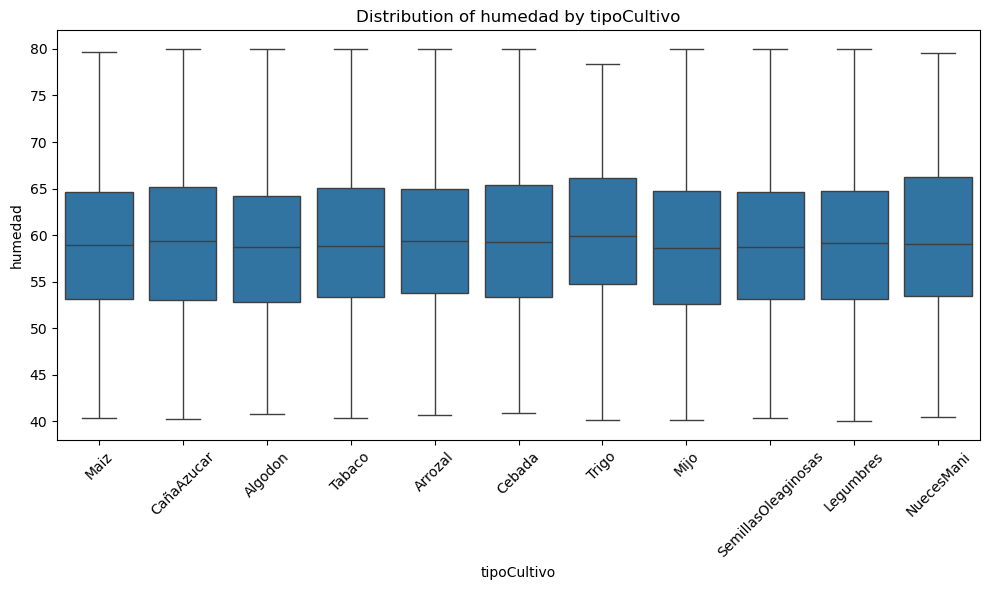


Statistics for humedad by tipoCultivo:
                     count       mean       std    min      25%     50%  \
tipoCultivo                                                               
Algodon              722.0  58.667729  8.055912  40.79  52.8700  58.685   
Arrozal              706.0  59.356572  7.943920  40.70  53.8250  59.330   
CañaAzucar           763.0  59.360105  8.319623  40.23  53.0600  59.340   
Cebada               703.0  59.230939  8.141439  40.88  53.3100  59.280   
Legumbres            728.0  59.093310  7.972969  40.02  53.1775  59.105   
Maiz                 753.0  59.005950  8.104950  40.33  53.1000  58.910   
Mijo                 718.0  58.766393  8.182250  40.17  52.6100  58.645   
NuecesMani           732.0  59.429536  8.681613  40.44  53.4450  59.005   
SemillasOleaginosas  711.0  58.972925  8.163891  40.36  53.1300  58.750   
Tabaco               717.0  59.266709  8.347851  40.37  53.3400  58.870   
Trigo                747.0  60.132289  7.959758  40.17  54.7

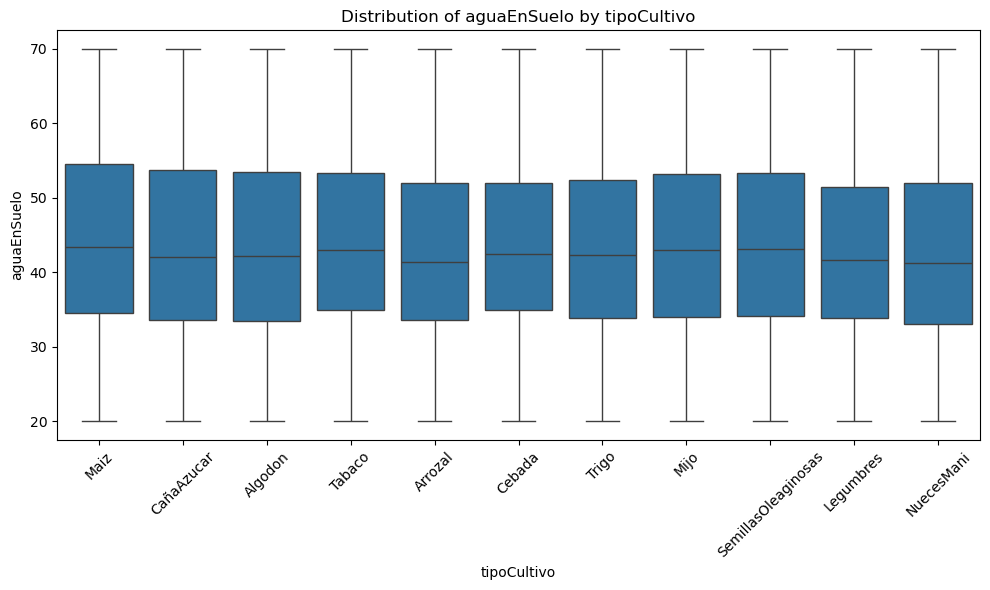


Statistics for aguaEnSuelo by tipoCultivo:
                     count       mean        std   min      25%     50%  \
tipoCultivo                                                               
Algodon              722.0  43.648989  12.758185  20.0  33.4150  42.145   
Arrozal              706.0  42.951686  12.560823  20.0  33.5400  41.350   
CañaAzucar           763.0  43.548938  12.953454  20.0  33.6100  42.030   
Cebada               703.0  43.483514  12.043758  20.0  34.9750  42.470   
Legumbres            728.0  43.016113  12.279928  20.0  33.8100  41.675   
Maiz                 753.0  44.526348  12.929468  20.0  34.5600  43.390   
Mijo                 718.0  43.792813  12.710698  20.0  33.9700  43.020   
NuecesMani           732.0  42.852254  12.581665  20.0  33.1125  41.295   
SemillasOleaginosas  711.0  43.859761  12.688233  20.0  34.1800  43.070   
Tabaco               717.0  44.259582  12.462228  20.0  34.9600  43.020   
Trigo                747.0  43.424525  12.494059  20.0  

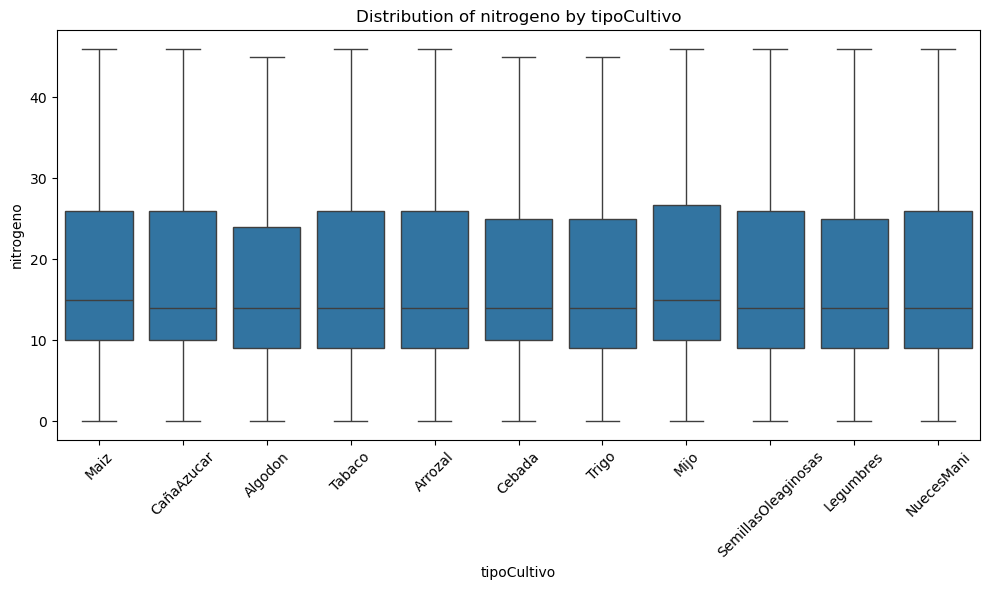


Statistics for nitrogeno by tipoCultivo:
                     count       mean        std  min   25%   50%    75%   max
tipoCultivo                                                                   
Algodon              722.0  17.984765  11.403021  0.0   9.0  14.0  24.00  45.0
Arrozal              706.0  18.518414  12.040373  0.0   9.0  14.0  26.00  46.0
CañaAzucar           763.0  18.764089  12.045165  0.0  10.0  14.0  26.00  46.0
Cebada               703.0  17.870555  11.524730  0.0  10.0  14.0  25.00  45.0
Legumbres            728.0  18.086538  11.642872  0.0   9.0  14.0  25.00  46.0
Maiz                 753.0  18.903054  11.708785  0.0  10.0  15.0  26.00  46.0
Mijo                 718.0  19.171309  12.122683  0.0  10.0  15.0  26.75  46.0
NuecesMani           732.0  18.314208  12.056282  0.0   9.0  14.0  26.00  46.0
SemillasOleaginosas  711.0  18.412096  12.052599  0.0   9.0  14.0  26.00  46.0
Tabaco               717.0  18.605300  11.961373  0.0   9.0  14.0  26.00  46.0
Trigo     

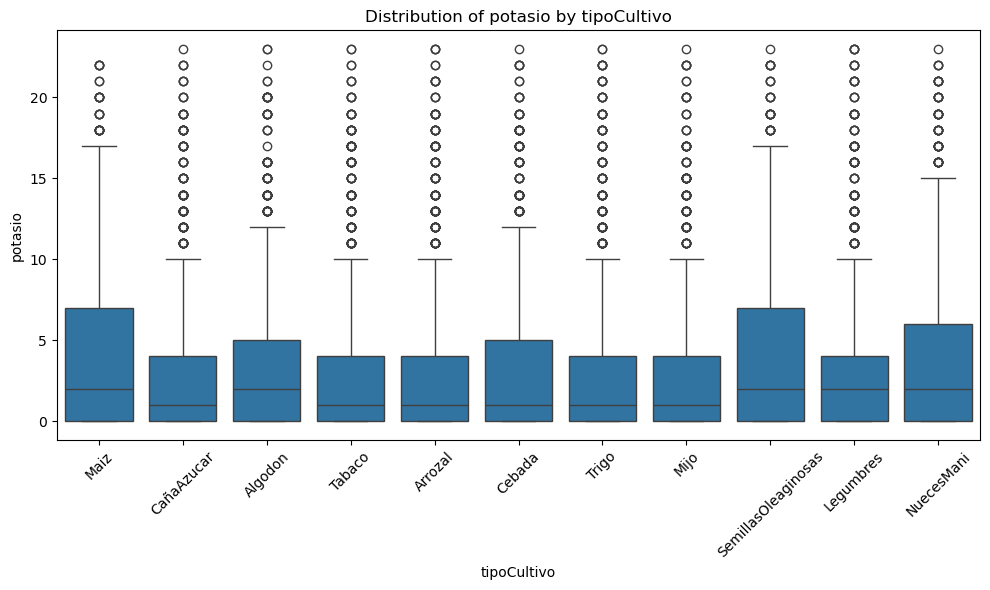


Statistics for potasio by tipoCultivo:
                     count      mean       std  min  25%  50%  75%   max
tipoCultivo                                                             
Algodon              722.0  3.878116  5.259068  0.0  0.0  2.0  5.0  23.0
Arrozal              706.0  3.862606  5.635711  0.0  0.0  1.0  4.0  23.0
CañaAzucar           763.0  3.657929  5.314977  0.0  0.0  1.0  4.0  23.0
Cebada               703.0  3.960171  5.558660  0.0  0.0  1.0  5.0  23.0
Legumbres            728.0  3.927198  5.584063  0.0  0.0  2.0  4.0  23.0
Maiz                 753.0  4.138114  5.516132  0.0  0.0  2.0  7.0  22.0
Mijo                 718.0  3.479109  5.171425  0.0  0.0  1.0  4.0  23.0
NuecesMani           732.0  4.248634  5.688295  0.0  0.0  2.0  6.0  23.0
SemillasOleaginosas  711.0  4.272855  5.665943  0.0  0.0  2.0  7.0  23.0
Tabaco               717.0  3.835425  5.478574  0.0  0.0  1.0  4.0  23.0
Trigo                747.0  3.825971  5.539207  0.0  0.0  1.0  4.0  23.0




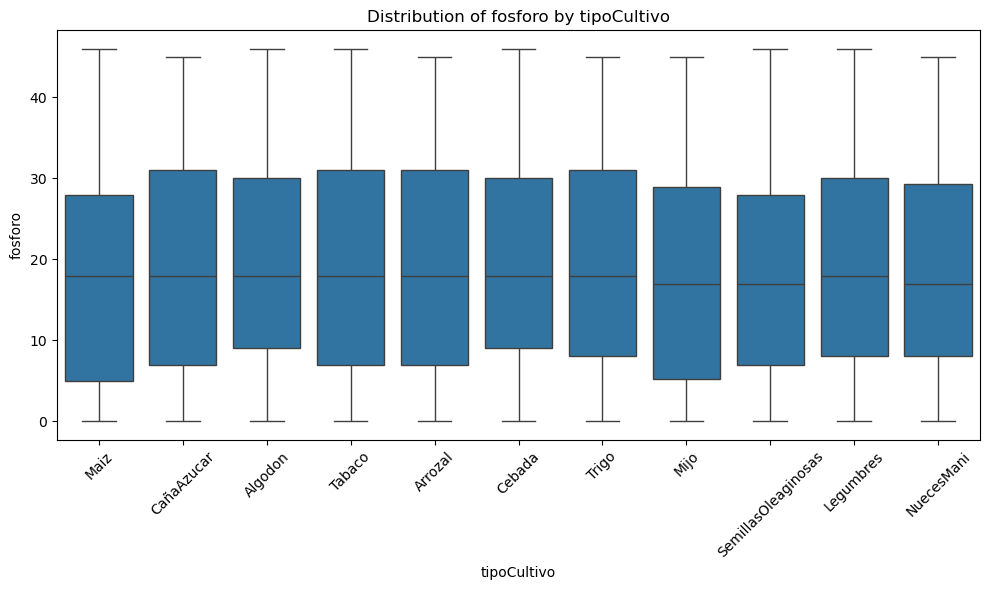


Statistics for fosforo by tipoCultivo:
                     count       mean        std  min   25%   50%    75%   max
tipoCultivo                                                                   
Algodon              722.0  19.000000  13.019456  0.0  9.00  18.0  30.00  46.0
Arrozal              706.0  18.745042  13.484328  0.0  7.00  18.0  31.00  45.0
CañaAzucar           763.0  18.466579  13.491997  0.0  7.00  18.0  31.00  45.0
Cebada               703.0  19.028450  13.257446  0.0  9.00  18.0  30.00  46.0
Legumbres            728.0  18.906593  13.333705  0.0  8.00  18.0  30.00  46.0
Maiz                 753.0  17.784861  12.891381  0.0  5.00  18.0  28.00  46.0
Mijo                 718.0  17.834262  13.225186  0.0  5.25  17.0  29.00  45.0
NuecesMani           732.0  18.467213  13.233472  0.0  8.00  17.0  29.25  45.0
SemillasOleaginosas  711.0  17.749648  12.978391  0.0  7.00  17.0  28.00  46.0
Tabaco               717.0  18.708508  13.448540  0.0  7.00  18.0  31.00  46.0
Trigo       

In [ ]:
def plot_boxplots_by_target(df, target_column, figsize=(15, 10), max_cols=3):
    """
    Creates boxplots for all numeric variables in the dataframe, grouped by the target variable.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe containing the data
    target_column : str
        The name of the target column
    figsize : tuple
        Base figure size (will be adjusted based on number of variables)
    max_cols : int
        Maximum number of columns in the subplot grid
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # Remove target if it's in numeric columns
    if target_column in numeric_cols:
        numeric_cols.remove(target_column)
    
    if len(numeric_cols) == 0:
        print("No numeric columns found in the dataset.")
        return
    
    # Calculate grid dimensions
    n_cols = min(max_cols, len(numeric_cols))
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    
    # Adjust figure size based on number of subplots
    adjusted_figsize = (figsize[0], figsize[1] * (n_rows / 2))
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=adjusted_figsize)
    
    # Flatten axes array for easier indexing
    if n_rows > 1 or n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    # Create boxplots
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            sns.boxplot(x=target_column, y=col, data=df, ax=axes[i])
            axes[i].set_title(f'Distribution of {col} by {target_column}')
            axes[i].set_xlabel(target_column)
            axes[i].set_ylabel(col)
            
            # Rotate x-axis labels if there are many categories
            if df[target_column].nunique() > 3:
                axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
    # Hide unused subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Create a separate figure for each variable to see more details
    print("\nCreating individual boxplots for better visibility:")
    
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target_column, y=col, data=df)
        plt.title(f'Distribution of {col} by {target_column}')
        plt.xlabel(target_column)
        plt.ylabel(col)
        
        # Rotate x-axis labels if there are many categories
        if df[target_column].nunique() > 3:
            plt.xticks(rotation=45)
            
        plt.tight_layout()
        plt.show()
        
        # Print some statistics
        print(f"\nStatistics for {col} by {target_column}:")
        print(df.groupby(target_column)[col].describe())
        print("\n" + "="*80 + "\n")

# Use the function with your dataframe and target column
plot_boxplots_by_target(df_crude, 'tipoCultivo')

In [69]:
def analyze_categorical_relationships(df, target_col, categorical_cols=None, figsize=(12, 16)):
    """
    Analyze relationships between categorical variables and target variable
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataset containing the data
    target_col : str
        The name of the target column
    categorical_cols : list or None
        List of categorical columns to analyze. If None, all object and category columns will be used
    figsize : tuple
        Figure size for the plots
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # If categorical columns not specified, find all object and category columns
    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        # Remove target column from the list if it's there
        if target_col in categorical_cols:
            categorical_cols.remove(target_col)
    
    # Check if we have categorical columns to analyze
    if len(categorical_cols) == 0:
        print("No categorical columns found in the dataset.")
        return
    
    print(f"Analyzing relationships between {len(categorical_cols)} categorical variables and {target_col}")
    
    # For each categorical column, create a plot showing its relationship with the target
    for col in categorical_cols:
        # Create a figure with 2 rows and 1 column (vertical layout)
        fig, axes = plt.subplots(2, 1, figsize=figsize)
        
        # Create a crosstab to see the relationship
        cross_tab = pd.crosstab(df[col], df[target_col], normalize='index')
        
        # Plot heatmap of the relationship on the top subplot
        sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='.2%', ax=axes[0])
        axes[0].set_title(f'Relationship between {col} and {target_col} (Normalized)')
        axes[0].set_xlabel(target_col)
        axes[0].set_ylabel(col)
        
        # Plot count plot to see distribution on the bottom subplot
        sns.countplot(x=col, hue=target_col, data=df, ax=axes[1])
        axes[1].set_title(f'Distribution of {target_col} by {col}')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Count')
        axes[1].tick_params(axis='x', rotation=45)
        
        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()
        
        # Print some statistics
        print(f"\nContingency table for {col} and {target_col}:")
        print(pd.crosstab(df[col], df[target_col]))
        
        # Chi-square test for independence
        from scipy.stats import chi2_contingency
        contingency_table = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"\nChi-square test for independence:")
        print(f"Chi2 value: {chi2:.4f}")
        print(f"p-value: {p:.4f}")
        print(f"Degrees of freedom: {dof}")
        if p < 0.05:
            print(f"Result: There is a significant relationship between {col} and {target_col} (p < 0.05)")
        else:
            print(f"Result: No significant relationship detected between {col} and {target_col} (p >= 0.05)")
        
        print("\n" + "="*80 + "\n")

Analyzing relationships between 2 categorical variables and tipoCultivo


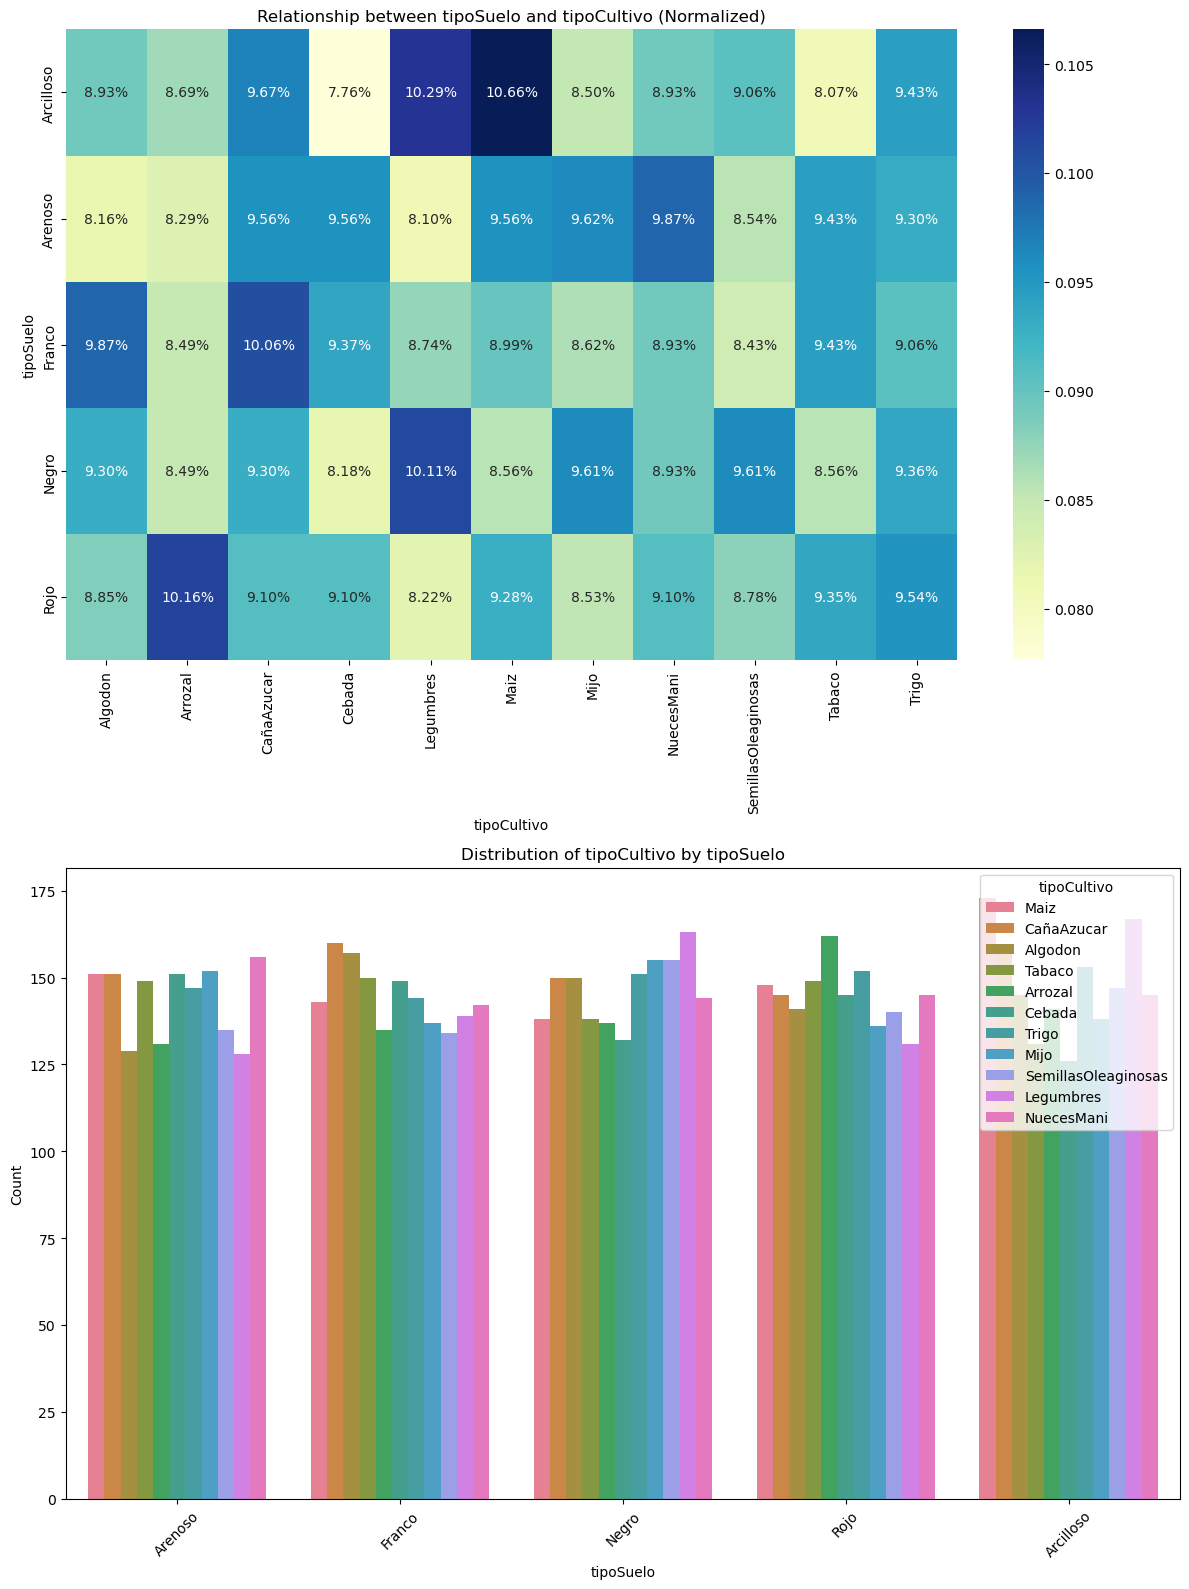


Contingency table for tipoSuelo and tipoCultivo:
tipoCultivo  Algodon  Arrozal  CañaAzucar  Cebada  Legumbres  Maiz  Mijo  \
tipoSuelo                                                                  
Arcilloso        145      141         157     126        167   173   138   
Arenoso          129      131         151     151        128   151   152   
Franco           157      135         160     149        139   143   137   
Negro            150      137         150     132        163   138   155   
Rojo             141      162         145     145        131   148   136   

tipoCultivo  NuecesMani  SemillasOleaginosas  Tabaco  Trigo  
tipoSuelo                                                    
Arcilloso           145                  147     131    153  
Arenoso             156                  135     149    147  
Franco              142                  134     150    144  
Negro               144                  155     138    151  
Rojo                145                  140 

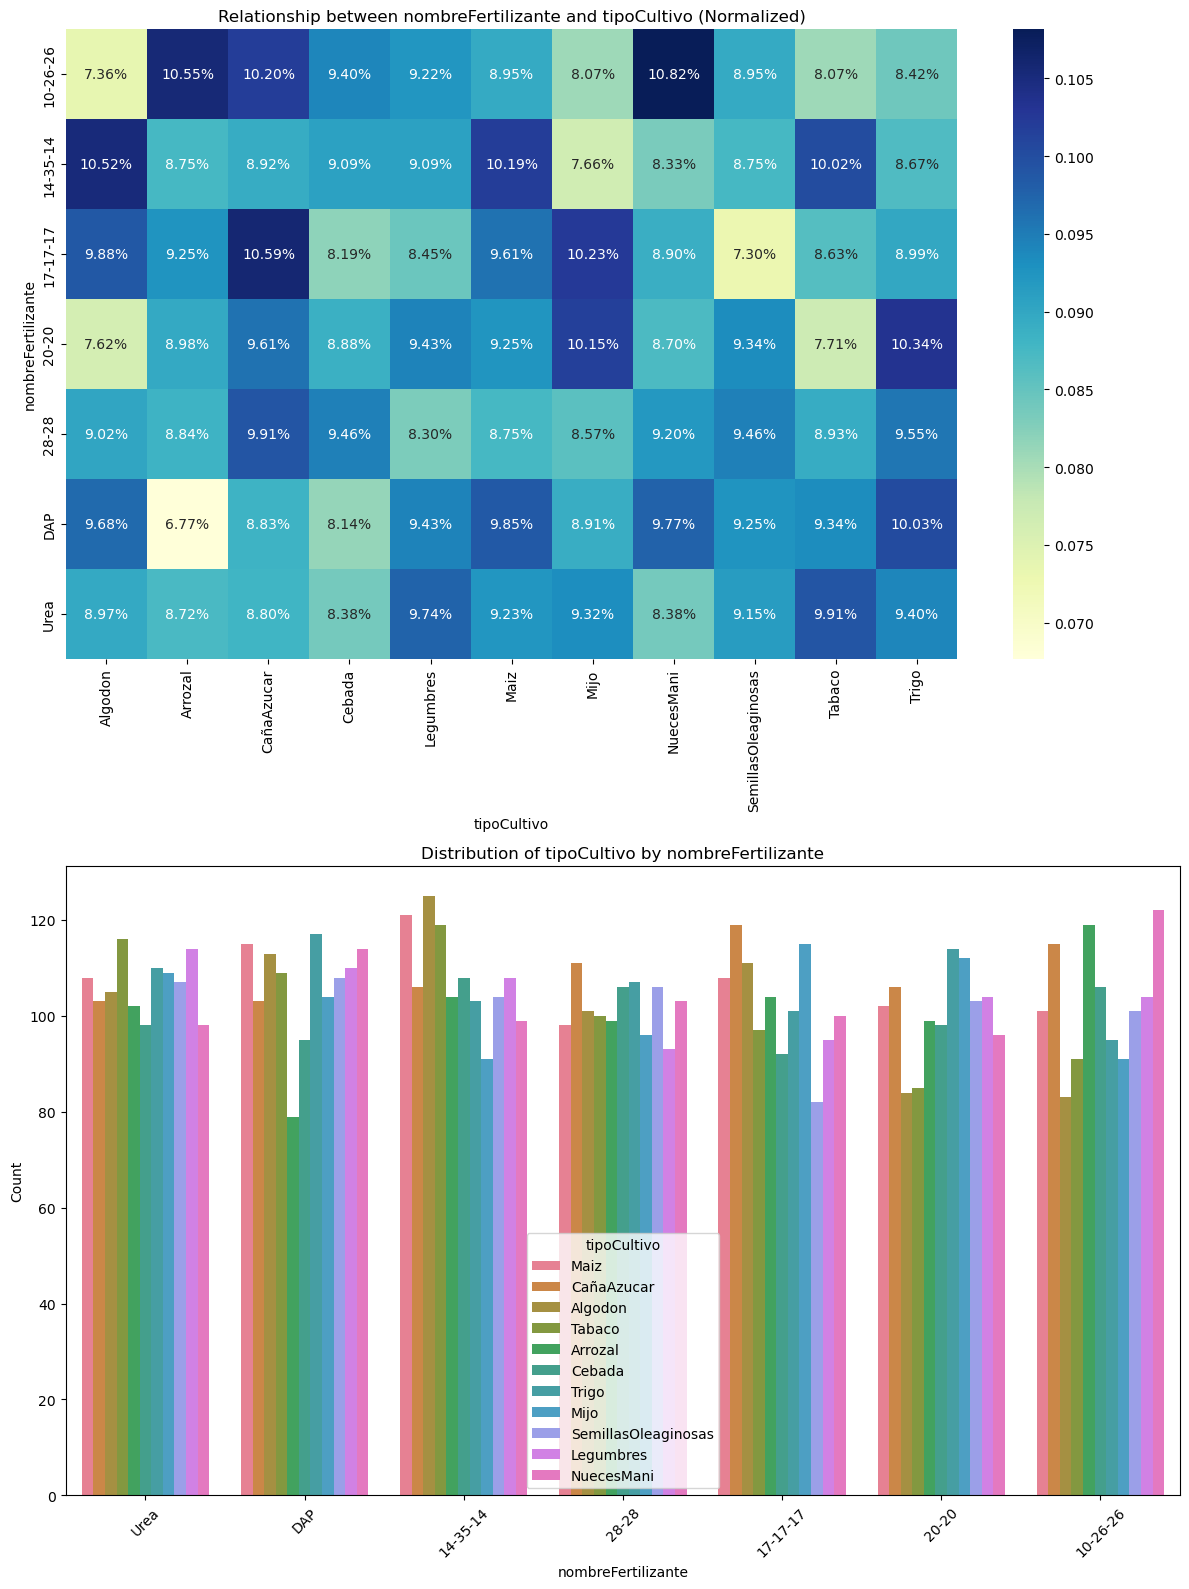


Contingency table for nombreFertilizante and tipoCultivo:
tipoCultivo         Algodon  Arrozal  CañaAzucar  Cebada  Legumbres  Maiz  \
nombreFertilizante                                                          
10-26-26                 83      119         115     106        104   101   
14-35-14                125      104         106     108        108   121   
17-17-17                111      104         119      92         95   108   
20-20                    84       99         106      98        104   102   
28-28                   101       99         111     106         93    98   
DAP                     113       79         103      95        110   115   
Urea                    105      102         103      98        114   108   

tipoCultivo         Mijo  NuecesMani  SemillasOleaginosas  Tabaco  Trigo  
nombreFertilizante                                                        
10-26-26              91         122                  101      91     95  
14-35-14              

In [70]:
analyze_categorical_relationships(df_crude, 'tipoCultivo')


In [62]:
X

,temperatura,humedad,aguaEnSuelo,tipoSuelo,nitrogeno,potasio,fosforo,nombreFertilizante
0,26.00,52.00,38.00,Arenoso,37,0,0,Urea
1,29.00,52.00,45.00,Franco,12,0,36,DAP
2,34.00,65.00,62.00,Negro,7,9,30,14-35-14
3,32.00,62.00,34.00,Rojo,22,0,20,28-28
4,28.00,54.00,46.00,Arcilloso,35,0,0,Urea
...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Franco,10,14,10,Urea
7996,39.39,71.67,49.34,Negro,35,0,0,10-26-26
7997,35.79,67.64,45.04,Rojo,41,0,0,Urea
7998,37.78,73.38,36.03,Negro,10,3,30,DAP


In [63]:
# Aplicar One-Hot Encoding a las variables categóricas en X
def apply_one_hot_encoding(X):
    """
    Aplica One-Hot Encoding a las variables categóricas en el dataframe
    
    Parameters:
    -----------
    X : pandas DataFrame
        El dataframe con las variables a codificar
        
    Returns:
    --------
    pandas DataFrame
        Dataframe con las variables categóricas codificadas
    """
    import pandas as pd
    
    # Identificar columnas categóricas
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    
    if len(categorical_cols) == 0:
        print("No se encontraron variables categóricas para codificar.")
        return X
    
    print(f"Aplicando One-Hot Encoding a {len(categorical_cols)} variables categóricas:")
    print(categorical_cols)
    
    # Crear una copia para no modificar el original
    X_encoded = X.copy()
    
    # Aplicar one-hot encoding
    X_encoded = pd.get_dummies(X_encoded, columns=categorical_cols, drop_first=False, prefix_sep='_')
    
    # Mostrar información sobre el resultado
    print(f"\nDimensiones originales: {X.shape}")
    print(f"Dimensiones después de One-Hot Encoding: {X_encoded.shape}")
    print(f"Nuevas columnas creadas: {X_encoded.shape[1] - X.shape[1]}")
    
    # Mostrar las primeras columnas codificadas
    new_cols = [col for col in X_encoded.columns if col not in X.columns]
    if len(new_cols) > 0:
        print("\nPrimeras 5 columnas codificadas (o todas si hay menos):")
        for col in new_cols[:5]:
            print(f"- {col}")
        
        if len(new_cols) > 5:
            print(f"... y {len(new_cols) - 5} más")
    
    return X_encoded

# Aplicar One-Hot Encoding a X
X_encoded = apply_one_hot_encoding(X)

# Verificar el resultado
print("\nPrimeras filas del dataframe codificado:")
X_encoded.head()

Aplicando One-Hot Encoding a 2 variables categóricas:
['tipoSuelo', 'nombreFertilizante']

Dimensiones originales: (8000, 8)
Dimensiones después de One-Hot Encoding: (8000, 18)
Nuevas columnas creadas: 10

Primeras 5 columnas codificadas (o todas si hay menos):
- tipoSuelo_Arcilloso
- tipoSuelo_Arenoso
- tipoSuelo_Franco
- tipoSuelo_Negro
- tipoSuelo_Rojo
... y 7 más

Primeras filas del dataframe codificado:


,temperatura,humedad,aguaEnSuelo,nitrogeno,potasio,fosforo,tipoSuelo_Arcilloso,tipoSuelo_Arenoso,tipoSuelo_Franco,tipoSuelo_Negro,tipoSuelo_Rojo,nombreFertilizante_10-26-26,nombreFertilizante_14-35-14,nombreFertilizante_17-17-17,nombreFertilizante_20-20,nombreFertilizante_28-28,nombreFertilizante_DAP,nombreFertilizante_Urea
0,26.0,52.0,38.0,37,0,0,False,True,False,False,False,False,False,False,False,False,False,True
1,29.0,52.0,45.0,12,0,36,False,False,True,False,False,False,False,False,False,False,True,False
2,34.0,65.0,62.0,7,9,30,False,False,False,True,False,False,True,False,False,False,False,False
3,32.0,62.0,34.0,22,0,20,False,False,False,False,True,False,False,False,False,True,False,False
4,28.0,54.0,46.0,35,0,0,True,False,False,False,False,False,False,False,False,False,False,True
